## Prediksi churn terhadap pelanggan kartu kredit 



Problem Statement   : Manajer bank menghadapi tantangan penurunan jumlah pelanggan kartu kredit di bank mereka. Untuk mengatasi hal tersebut, perlu dilakukan analisis terhadap faktor-faktor yang berkontribusi pada penurunan ini. Selain itu, penting juga untuk memprediksi pelanggan mana yang mungkin akan keluar dari layanan, sehingga langkah-langkah pencegahan yang tepat dapat diambil. Dengan melakukan prediksi churn, bank dapat menyediakan layanan khusus dan penawaran yang lebih menarik kepada pelanggan yang memiliki risiko tinggi untuk keluar, dengan tujuan menjaga pelanggan tetap loyal dan puas.

Dari problem statement diatas, maka kita dapat membuat point point pertanyaan.

- Karakteristik pelanggan manakah yang lebih cenderung untuk keluar dari layanan kartu kredit bank ?
- Apakah model yang dibentuk sudah baik dalam memprediksi pelanggan yang akan keluar ?
- Apa kelebihan dan kelemahan dari model yang sudah dibuat dalam memprediksi pelanggan yang akan keluar ?
- Apa dampak positif yang dapat diberikan dari segi bisnis dalam pembuatan model ?

## 1 - Introduction

Title               : Prediksi churn terhadap pelanggan kartu kredit

Nama                : Muhammad Aji Satrio W

Batch               : FTDS - 20

Brief Introduction  :  Saya seorang data scientist dengan semangat untuk mengejar peran sebagai data scientist yang memuaskan, memanfaatkan dasar akademik saya untuk unggul dalam bidang ilmu data. Gabungan pengetahuan ilmiah saya dan kemampuan teknis dari bootcamp memberikan saya perspektif yang baik, meningkatkan tekad, adaptabilitas, dan semangat untuk terus belajar. Saya yakin akan potensi saya untuk berkembang sebagai data scientist dan dapat memberikan kontribusi yang signifikan bagi industri. Dan yang terakhir semoga hasil yang saya lakukan dalam mengerjakan project dalam kompetisi ini memuaskan.

Dataset             : https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

Deployment Link     : https://huggingface.co/spaces/recognize96/Final_Project_Customer_Churn


## 2 - Import 

In [7]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder,  OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.layers import Input, concatenate, Dense
from tensorflow.keras import Model
from sklearn.impute import SimpleImputer
from scipy.stats import chi2
from sklearn.feature_selection import mutual_info_classif, f_classif
from tensorflow.keras.layers import BatchNormalization
from matplotlib.lines import Line2D
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import metrics
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1,l2
from keras.metrics import Precision, Recall, AUC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import shap
from tqdm import tqdm 
from keras import backend as K


## 3 - Data Loading

In [650]:
#read data
data = pd.read_csv("credit_card_churn.csv")

## Credit Card Customer Data Description

- **CLIENTNUM**: Unique identifier for the customer holding the account.
- **Attrition_Flag**: Internal event variable.
- **Customer_Age**: Customer's age in years.
- **Gender**: Gender of the account holder. M=Male, F=Female.
- **Dependent_count**: Number of dependents of the account holder.
- **Education_Level**: Educational qualification of the account holder (e.g., high school, college graduate, etc.).
- **Marital_Status**: Marital status of the account holder (Married, Single, Divorced, Unknown).
- **Income_Category**: Annual income category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K - $120K, >).
- **Card_Category**: Type of card (Blue, Silver, Gold, Platinum).
- **Months_on_Book**: Period of relationship with the bank.
- **Total_Relationship_Count**: Total number of products held by the customer.
- **Months_Inactive_12_mon**: Number of months inactive in the last 12 months.
- **Contacts_Count_12_mon**: Number of contacts in the last 12 months.
- **Credit_Limit**: Credit limit on the credit card.
- **Total_Revolving_Bal**: Total revolving balance on the credit card.
- **Avg_Open_To_Buy**: Average open to buy credit line (average of last 12 months).
- **Total_Amt_Chng_Q4_Q1**: Change in transaction amount (Q4 over Q1).
- **Total_Trans_Amt**: Total transaction amount in the last 12 months.
- **Total_Trans_Ct**: Total transaction count in the last 12 months.
- **Total_Ct_Chng_Q4_Q1**: Change in transaction count (Q4 over Q1).
- **Avg_Utilization_R**: Average card utilization ratio.



In [9]:
#dropping unnecessary column
data.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'],
          axis=1, inplace=True)


In [513]:
#download new data
data.to_csv("credit_card_churn_clean.csv", index=False)

In [508]:
#overview data
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [12]:
#checking data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [13]:
#checking total unique for every features available 
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [14]:
#checking missing data
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [15]:
#data description
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


## 4 - Exploratory Data Analysis ( EDA )

Berdasarkan point objective yang sudah dibuat yaitu mencari karakteristik pelanggan manakan yang lebih cenderung untuk churn , maka dilakukan eda pada masing masing feature terhadap targetny ( dalam hal ini feature attrition_flag )

In [18]:
#copy data 
eda  = data.copy()

In [20]:
def eda_countplot(x, y, data):
    feat = x
    hue = y
    hue_type = data[hue].dtype.type
    groups = data[feat].dropna().unique()
    data_cleaned = data.dropna(subset=[hue])
    proportions = data_cleaned.groupby(feat)[hue].value_counts(normalize=True).unstack()
    sns.set(style="whitegrid", rc={'figure.figsize': (10, 6)})
    color_palette = sns.color_palette('crest')
    ax = sns.countplot(x=feat, hue=hue, data=data_cleaned, palette=color_palette)
    for c in ax.containers:
        labels = [f'{proportions.loc[g, hue_type(c.get_label())]:.1%}' for g in groups]
        ax.bar_label(c, labels)

    plt.xlabel(x)
    plt.ylabel('Count')
    plt.title(f'Count Plot: {hue} by {x}')
    plt.legend(title=hue)
    ax.legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=30, ha='right')
    plt.show()

In [633]:
def eda_hisplot(x, y, data):
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(data=data, x=x, hue=y, multiple="stack", palette='crest', alpha=0.7)
    plt.title(f'{x} Distribution with {y}')
    plt.xlabel(x)
    plt.ylabel('Frequency')
    mode_number = data[data[y] == 'Attrited Customer'][x].value_counts().idxmax()
    plt.text(0.7, 0.6, f'Mode {x}: {mode_number:.2f}', transform=plt.gca().transAxes)
    plt.show()


In [602]:
def bar_plot_1 (x , y ,  data) :
    yy2 = data.groupby(x)[y].value_counts(normalize=True).unstack()
    palette = 'crest'
    colors = sns.color_palette(palette, n_colors=len(yy2.columns))
    ax = yy2.plot(kind='bar', stacked=True, color=colors)
    ax.set_xlabel(x)
    ax.set_ylabel('Proportion')
    ax.set_title(f'Proportion of Attrition Flag for Each {x}')
    ax.legend(title='Attrition Flag', bbox_to_anchor=(1.05, 1), loc='upper left')
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.2%}', (x + width / 2, y + height), ha='center', fontsize=10, weight='bold')
    plt.tight_layout()
    plt.show()

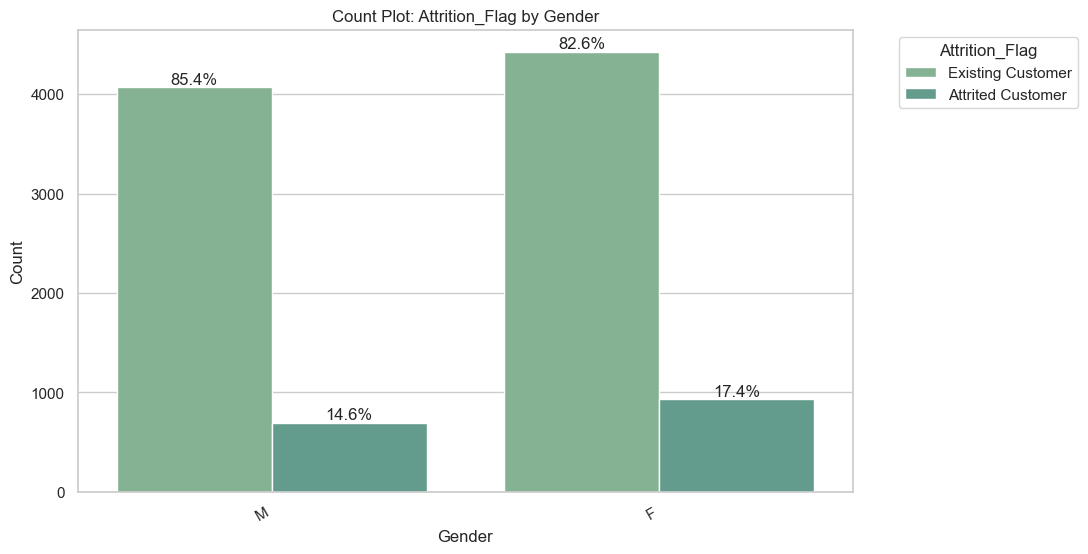

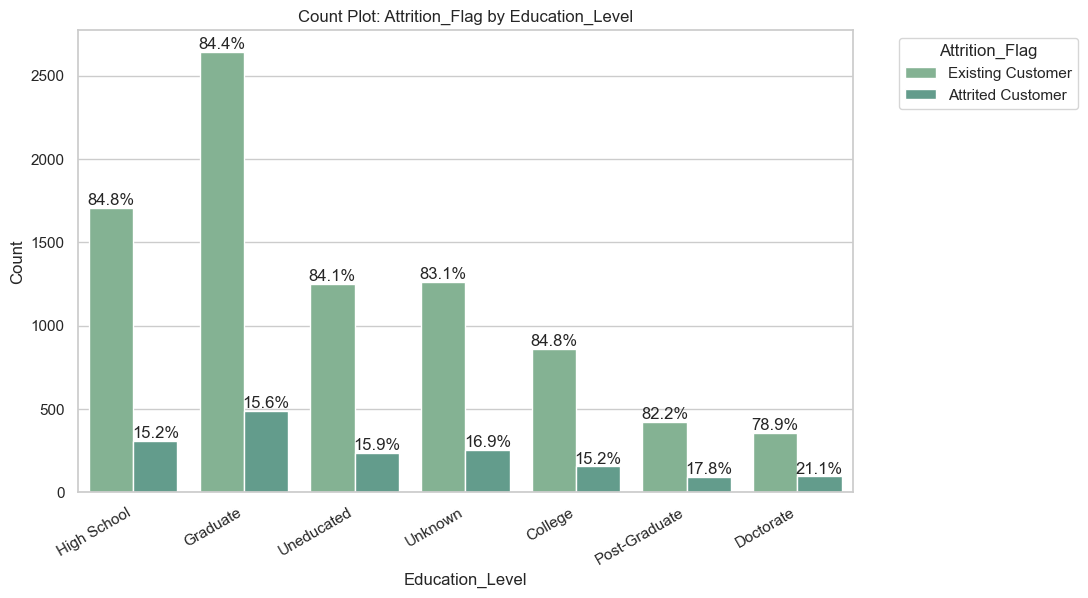

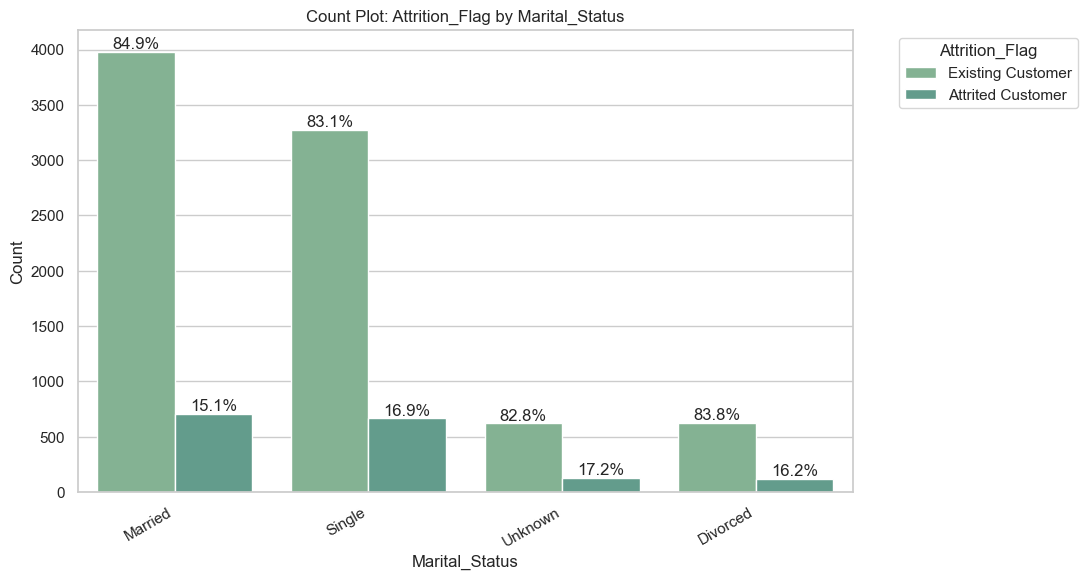

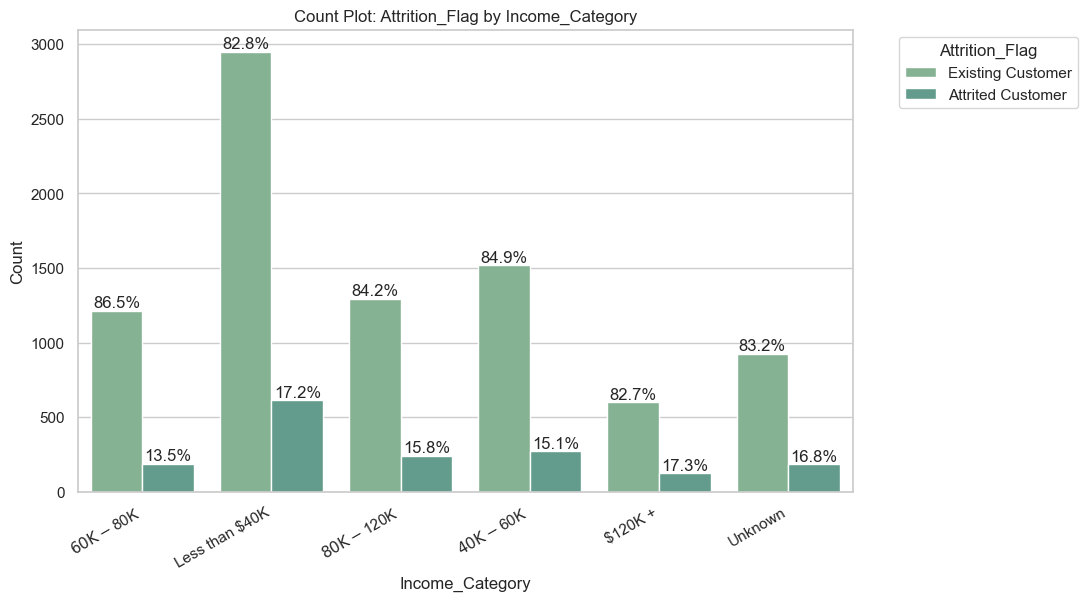

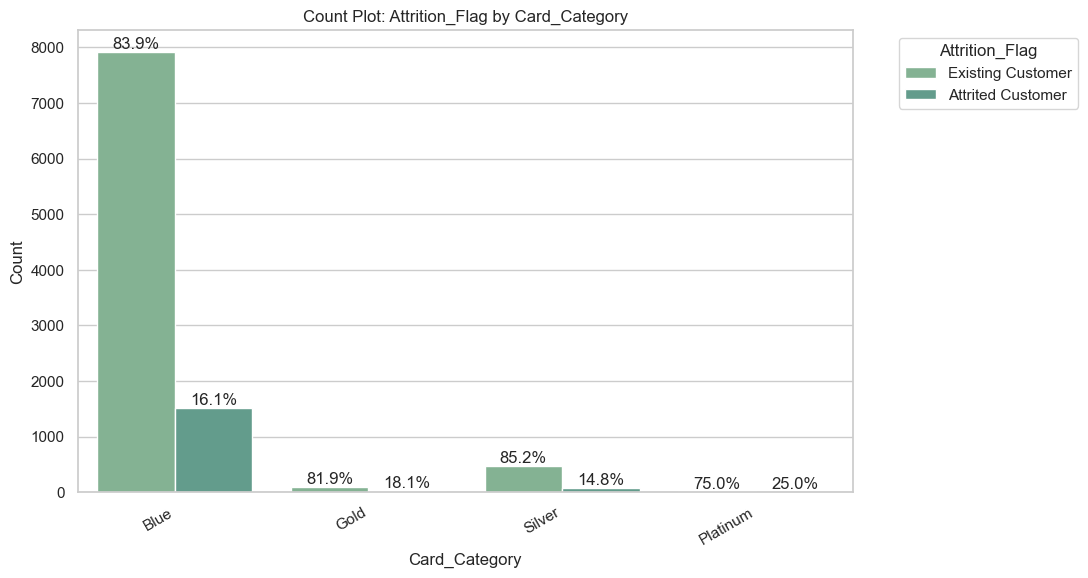

In [665]:
column1 = ["Gender"  ,'Education_Level', 'Marital_Status','Income_Category','Card_Category']
y = 'Attrition_Flag'
data = eda
for col in column1 :
    eda_countplot(col, y , data)

Berdasarkan plot diatas ada beberapa insight yang dapat diperoleh

Berdasarkan plot target terhadap gendere pelanggan, dapat dilihat baik secara total ataupun secara persentase pelanggan dengan gender perempuan cenderung untuk meninggalkan layanan kartu kredit.

Berdasarkan plot target terhadap tingkat edukasi pelanggan dapat terlihat bahwa jumlah pelanggan dengan tingkat pendidikan graduate memiliki jumlah pelanggan churn yang paling banyak. Namun jika kita melihat dari persentase terhadap masing masing kategorinya, pelanggan dengan tingkat pendidikan doctorate memiliki churn yang paling besar.

Berdasarkan plot target terhadap status perkawinann pelanggan dapat terlihat jumlah pelanggan dengan status perkawinan sudah menikah memiliki jumlah pelanggan churn yang paling tinggi. Namun jika melihat secara persentase pelanggan yang lebih memiliki menyembunyikan status hubungannya memiliki persentase churn lebih tinggi.

Berdasarkan plot target terhadap tingkat pendapatan pelanggan dapat terlihat pelanggan dengan pendapatan dibawah $40K mempuyai jumlah pelanggan churn yang lebih banyak, namun secara persentase seorang yang memiliki tingkat pendapatan >$120k memiliki % churn yang lebih tinggi

Berdasarkan plot target terhadap tingkat kartu yang dimiliki pelanggan dapat terlihat pelanggan yang memiliki kartu kredit blue memiliki jumlah pelanggan churn yang paling tinggi, namun secara persentase seorang yang memiliki kartu platinum memiliki % churn yang lebih tinggi

Berdasarkan plot target  terhadap pelanggan berdasarkan produk yang telah dipegang oleh pelanggan, dapat dilihat bahwa jumlah pelanggan yang memiliki 3 produk memiliki total pelanggan yang churn paling banyak dalam jumlah. Namun, jika kita melihat dari persentase terhadap total pelanggan pada setiap kategori jumlah produk, ternyata pelanggan yang memiliki jumlah produk antara 5 hingga 6 memiliki persentase churn yang paling tinggi.






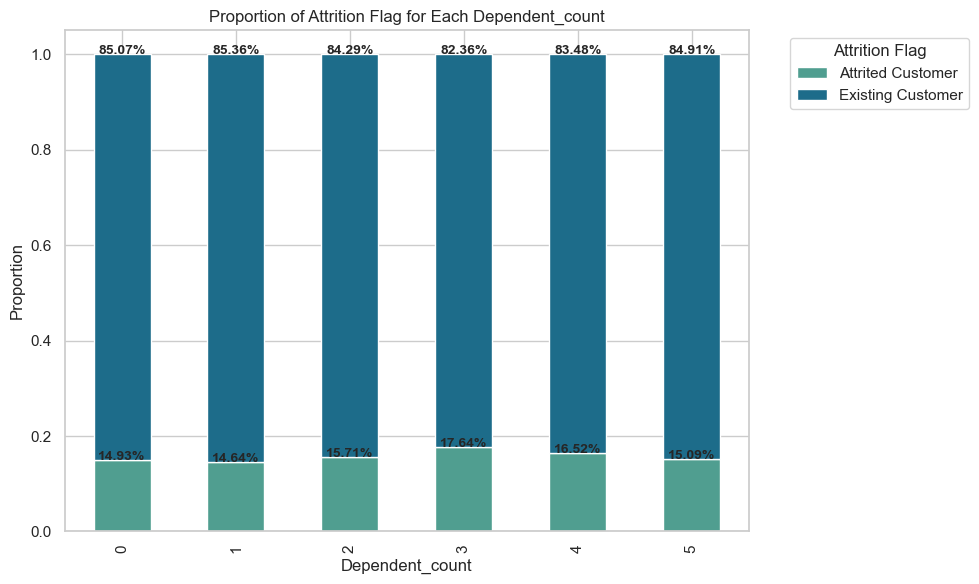

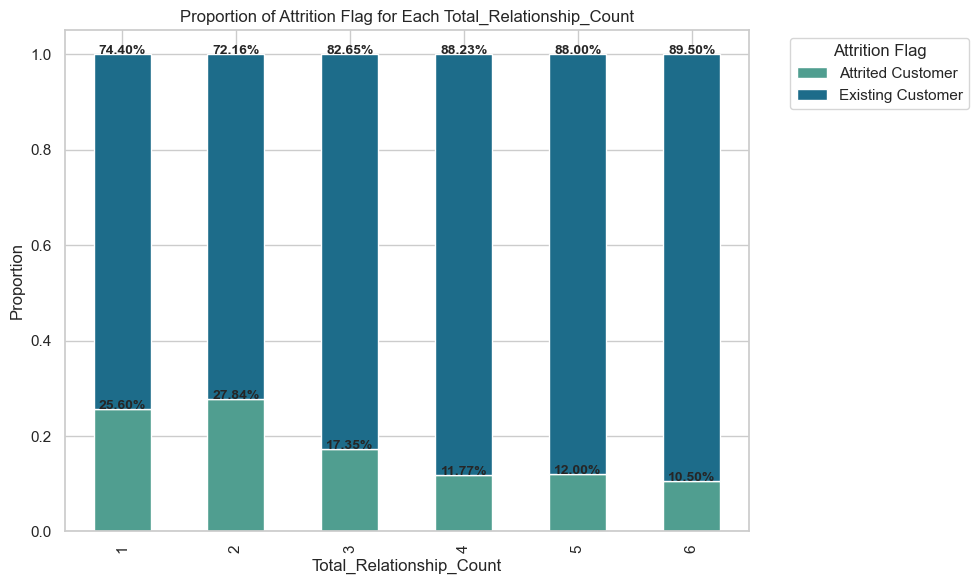

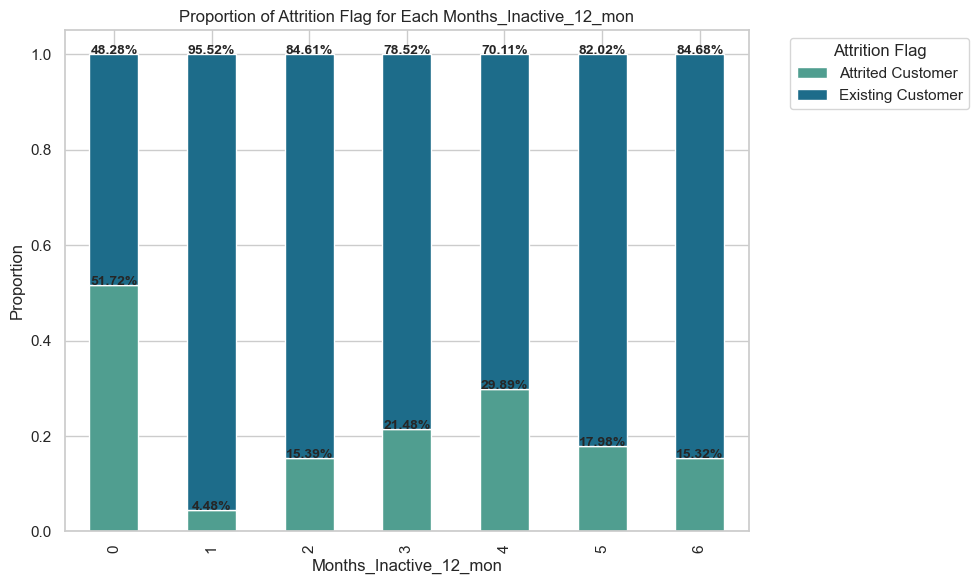

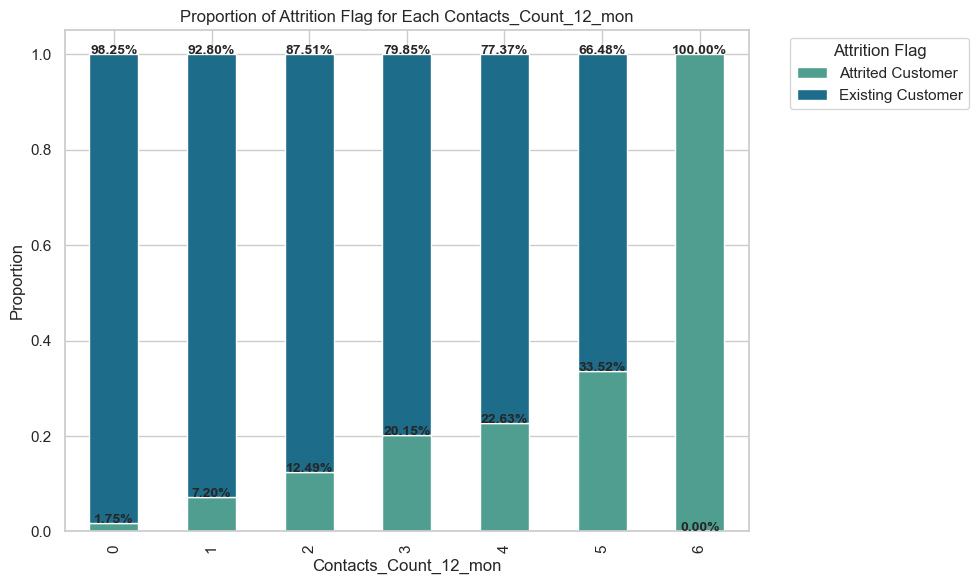

In [614]:
y = 'Attrition_Flag'
column2 = ['Dependent_count','Total_Relationship_Count', 'Months_Inactive_12_mon' , 'Contacts_Count_12_mon']
for col  in column2 :
    bar_plot_1 (col, y , data )

Dari plot target terhadap jumlah dependent pelanggan dapat terlihat , pelanggan dengan jumlah dependent sebanyak 3 orang memiliki tingkat % churn yang lebih tinggi dibanding yang lainnya

Dari plot target terhadap total jumlah produk yang dimiliki pelanggan dapat terlihat, pelanggan yang memiliki total produk yang lebih sedikit memiliki % churn yang lebih tinggi dibandingkan yang lainnya.

Dari plot target terhadap jumlah bulan yang tidak aktif setelah 12 bulan, pelanggan yang sudah tidak aktif lebih dari 4 bulan memiliki tingkat churn yang lebih tinggi

Dari plot target terhadap jumlah pelanggan yang dihubungi oleh bank, pelanggan yang sudah dikontak lebih dari 5 kali atau dalam hal ini jumlahnya 6 kali memiliki tingkat persentase churn 100% 



In [616]:
displot_df = data.drop(columns=column1 + column2, axis=1)
columns_to_list = displot_df.columns[2:].tolist()

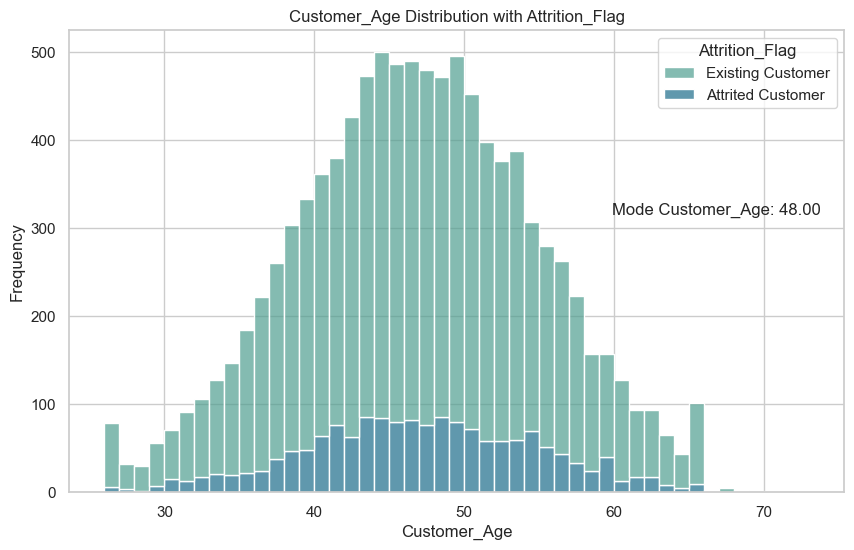

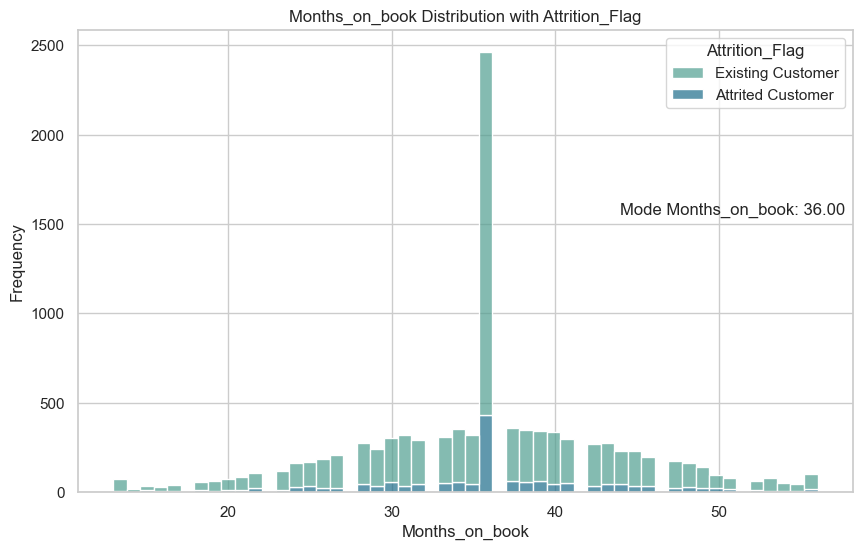

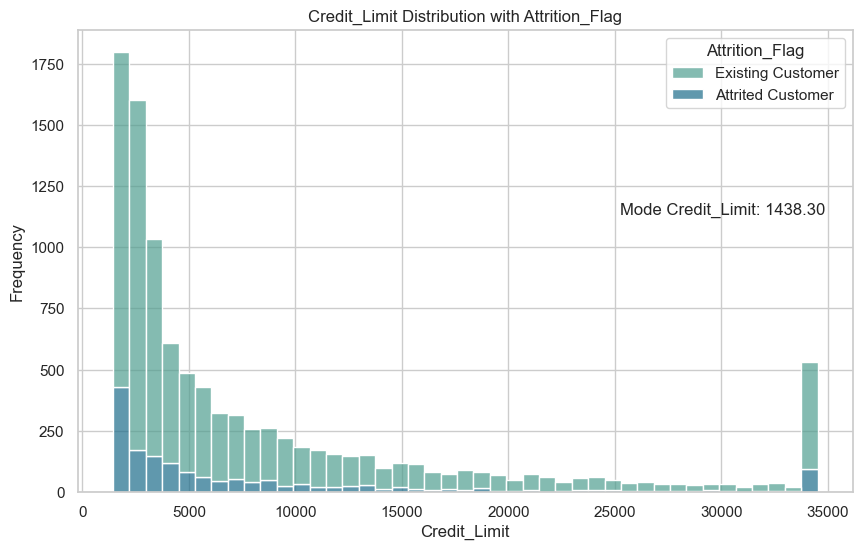

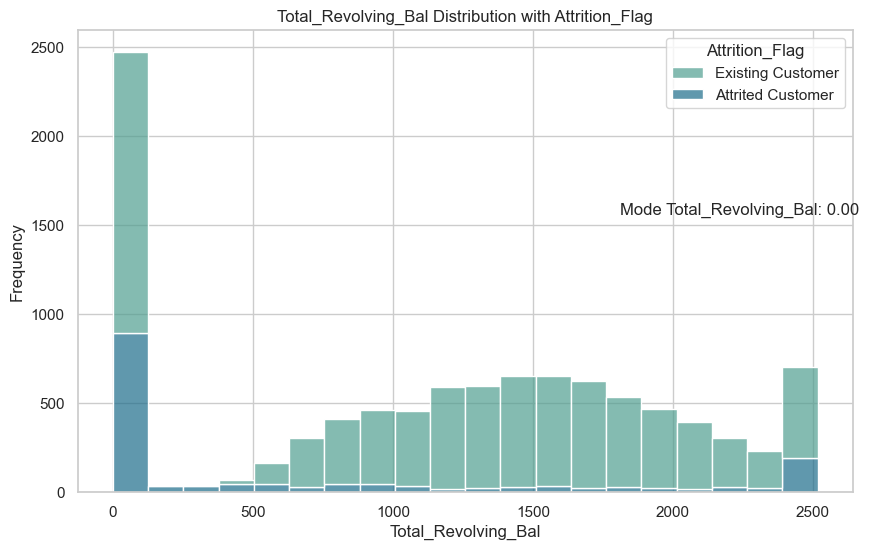

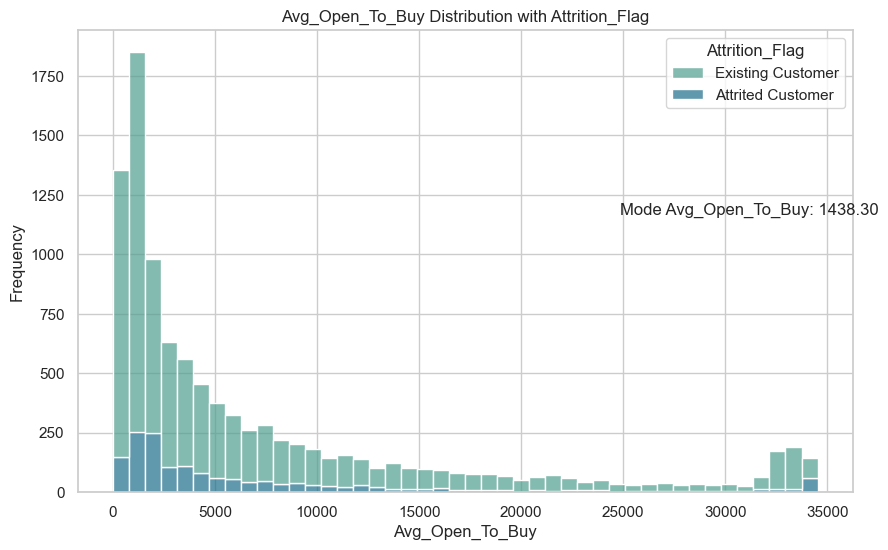

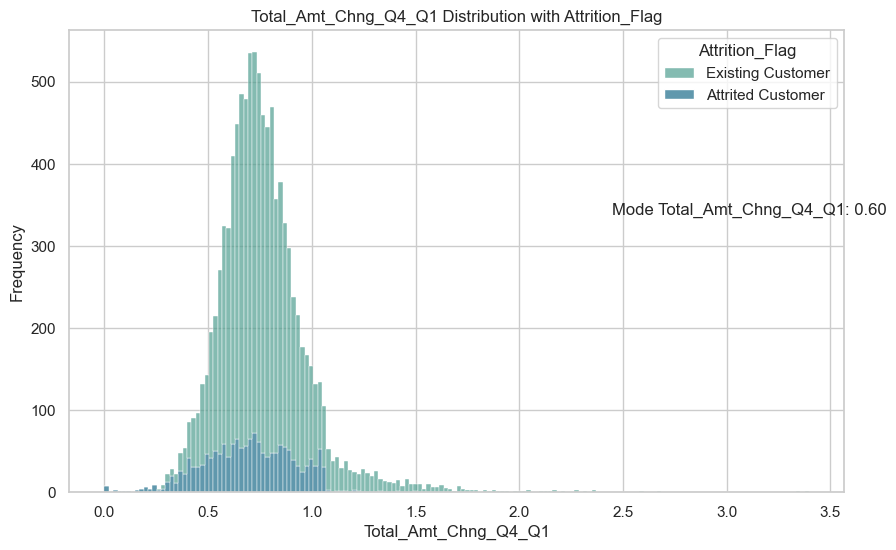

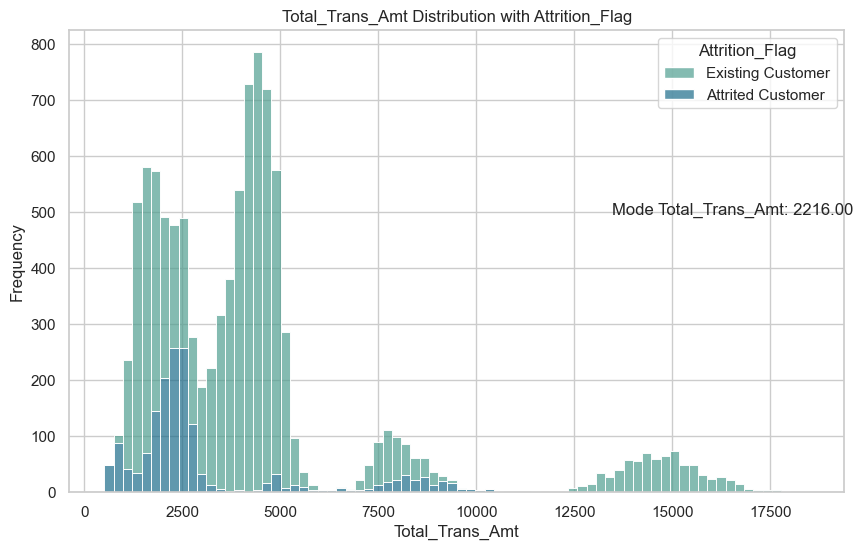

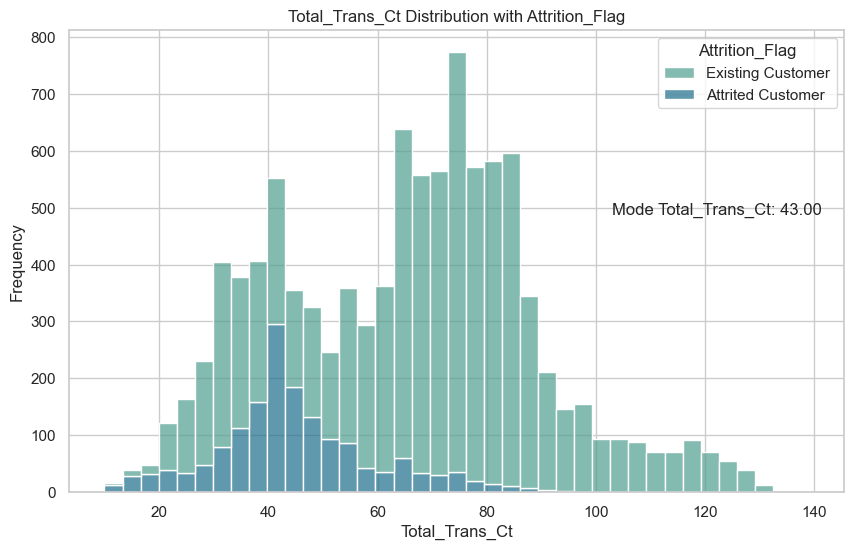

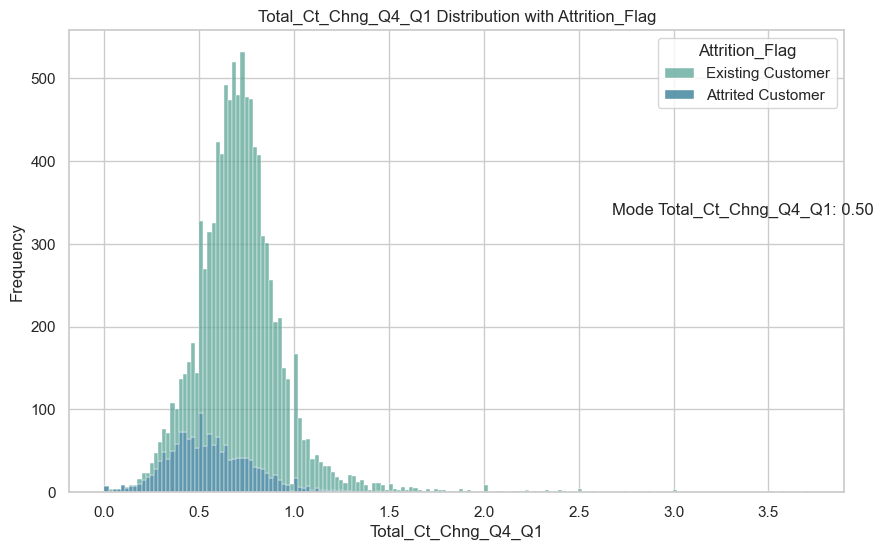

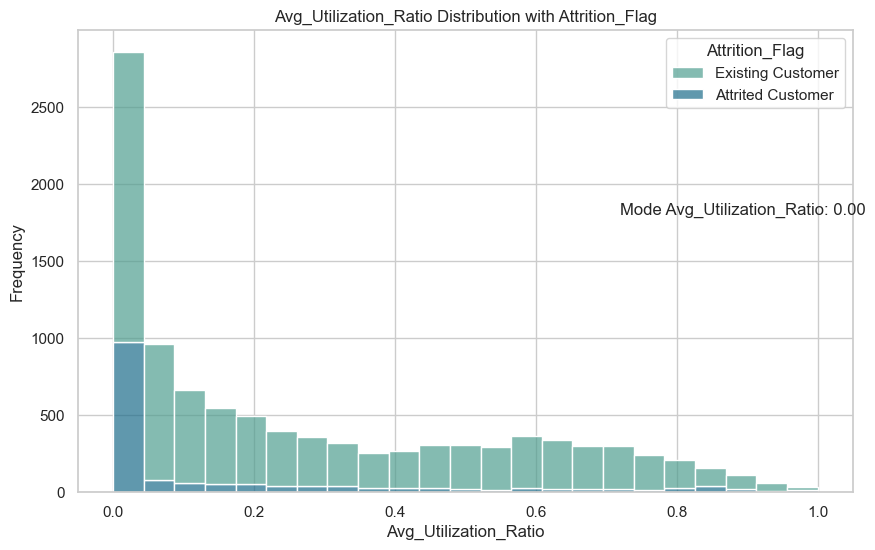

In [634]:
for col in columns_to_list :
    eda_hisplot(col , y , displot_df)

Berdasrkan plot histogram, customer dengan umur 48 tahun memiliki tingkat churn yang lebih tinggi

Berdasarkan Months on booknya , customer yang sudah bersama dengan bank selama 36 bulan memiliki tingkat churn yang lebih tinggi

Berdarkan credit card limitnya , customer dengan credit limit yang rendah memiliki tingkat churn yang lebih tinggi

Berdasarkan total revolving balancenya, customer dengan total revolving yang rendah memiliki tingkat churn yang lebih tinggi

Berdasarkan rata rata open to buy , customer dengan rata rata yang rendah memiliki tingkat churn yang lebih tinggi

Berdasarkan rate total balance yang berubah dari Q4 ke Q1 , customer yang memiliki rate 0.6 memiliki tingkat churn yang lebih tinggi

Berdasarkan total transaksinya , customer yang melakukan total transaksi sebesar 2216 memiliki tingkat churn yang lebih tinggi

Berdasarkan jumlah total transaksi selama 12 bulan, pelanggan dengan total transaksi sebesar 43 memiliki tingkat churn yang lebih tinggi

Berdasarkan jumlah total change dari Q4 ke Q1 , customer yang memiliki nilia 0.5 memiliki tingkat churn yang lebih tinggi

Berdasarkan avg utilization ratio, pelanggan yang memiliki ratio 0 memiliki tingkat churn yang lebih tinggi diantara yang lainnya

## 5 -  Feature Engineering

Setelah dilakukan explorasi data terhadap masing masing feature, maka tahap selanjutnya adalah pembuatan model. Sebelum melangkah kedalam pembuatan model , perlu dilakukan feature engineering terhadap data agar model dapat memprediksi secara general dan robust , sehingga menghasilkan hasil dan model yang baik.

#### 5 - 1 Splitting between X_Train , X_Test, X_Val

pada tahap ini dilakukan splitting train test dan val dari keseluruhan data

In [25]:
# Splitting between X and Y
X = data.drop(columns= 'Attrition_Flag', axis =1 )
y = data['Attrition_Flag']

In [26]:
# splitting x train , test , val
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y, test_size=0.15, random_state = 13 )
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state = 13)

In [27]:
#checking shape
print('Train size : ', X_train.shape)
print('Val size : ', X_val.shape)
print('Test size : ', X_test.shape)

Train size :  (7315, 20)
Val size :  (1292, 20)
Test size :  (1520, 20)


####  5 - 2 Checking & Handling Outliers

Agar menghasilkan model yang baik, dan dapat mengeneralisasi hasil secara keseluruhan perlu dilakukan handling outlier terhadap featurenya. Adapun feature yang dilakukan handling outlier adalah feature numerik.

In [635]:
cat_features = column1
num_features = columns_to_list

 Value skewness of Customer_Age  :  -0.018607337022922065
 Value skewness of Months_on_book  :  -0.07828620561403578
 Value skewness of Credit_Limit  :  1.639330198537878
 Value skewness of Total_Revolving_Bal  :  -0.1571424121525883
 Value skewness of Avg_Open_To_Buy  :  1.6345614155223678
 Value skewness of Total_Amt_Chng_Q4_Q1  :  1.8062210758765327
 Value skewness of Total_Trans_Amt  :  2.023029214745654
 Value skewness of Total_Trans_Ct  :  0.14375631344948878
 Value skewness of Total_Ct_Chng_Q4_Q1  :  2.1934313854599816
 Value skewness of Avg_Utilization_Ratio  :  0.724243009060064


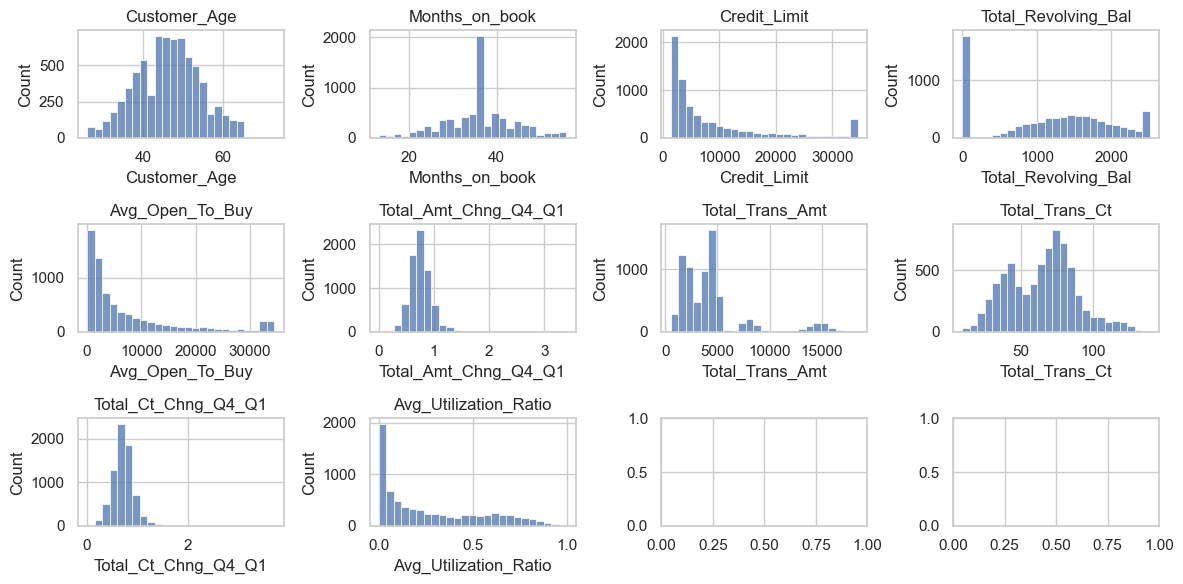

In [638]:
#menampilkan distribusi data pada feature
fig, axes = plt.subplots(3, 4, figsize=(12, 6))

for i, col in enumerate(num_features):
    row_idx = i // 4
    col_idx = i % 4
    sns.histplot(data=X_train[col], bins=25, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(col)
    print(f' Value skewness of {col}  : ', X_train[col].skew())
plt.tight_layout()
plt.show()

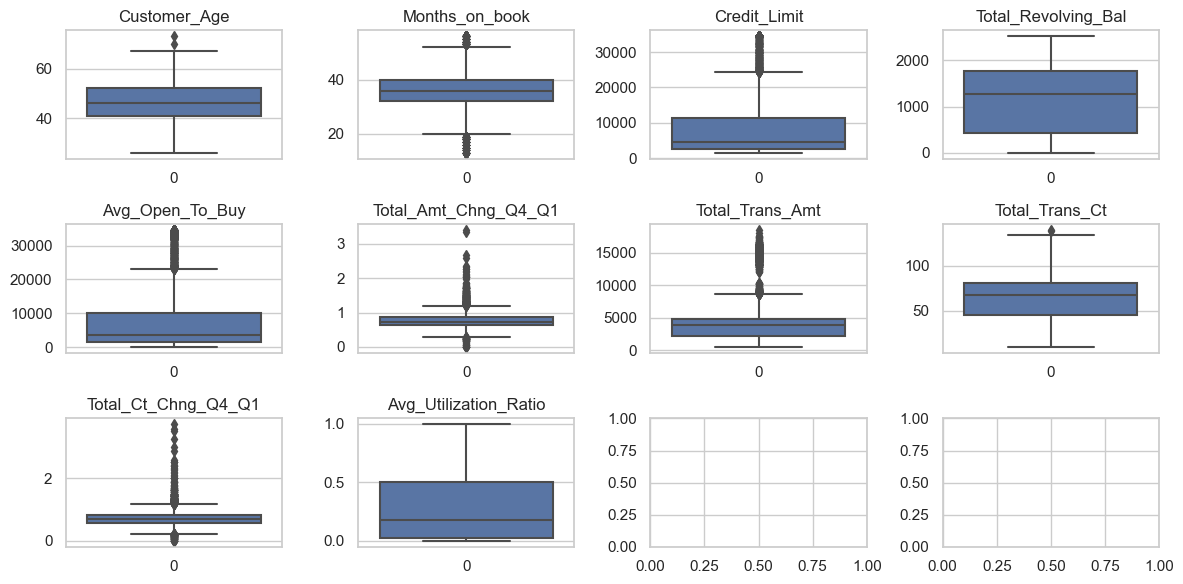

In [639]:
fig, axes = plt.subplots(3, 4, figsize=(12, 6))

for i, col in enumerate(num_features):
    row_idx = i // 4
    col_idx = i % 4
    sns.boxplot(data=X_train[col], ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(col)
plt.tight_layout()
plt.show()

Berdasarkan hasil distribusi, dan checking outliers dengan boxplot, beberapa feature memiliki outliers yang tinggi contohnya seperti months on book, avg_open to buy , total_amt_chang_Q4, total_trans_amt, total_ct_chng_q4_q1. Feature lainnya yang memiliki outlier tapi tidak banyak antara lain customer age dan total trans_ct, sedangkan feature yang tidak memiliki outlier adalah avg_utilization_ratio dan total_revolving.

Berdasarkan hasil distribusinya terlihat customer age, dan months on book memiliki distribusi yang normal. Sedangkan feature lainnya tidak memiliki distribusi yang normal. Oleh sebab itu penggantian outlier untuk feature customer_age dan months_on_book akan dilakukan dengan perhitugnan normal_dis, sedangkan selain itu akan dilakukan dengan perhitungan iqr. Untuk feature yang memiliki distribusi normal akan diganti dengan menggunakan nilai mean dari feature tsb , sedangkan feature yang tidak normal distribusinya diganti dengan menggunakan nilai median dari feature tsb.

In [32]:
outliers_1 = ['Customer_Age', 'Months_on_book']
outliers_2 = ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']

In [33]:
#perhitungan outler terhadap data normal
def normal_dis(df, variable):
    up_boundary = df[variable].mean() + 3 * df[variable].std()
    low_boundary = df[variable].mean() - 3 * df[variable].std()
    return up_boundary, low_boundary

In [34]:
#perhitungan outlier dengan iqr
def not_normal_dis (df, feature , distance):
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    low_boundary = df[feature].quantile(0.25) - (IQR * distance)
    up_boundary = df[feature].quantile(0.75) + (IQR * distance)
    return up_boundary, low_boundary

In [35]:
#checking persentase outliers
for feat in num_features:
    up_boundary, low_boundary = not_normal_dis(data, feat, 1.5)
    total_data = len(data)
    total_outliers_up = len(data[data[feat] > up_boundary])
    total_outliers_low = len(data[data[feat] < low_boundary])
    percentage_outliers_up = (total_outliers_up / total_data) * 100
    percentage_outliers_low = (total_outliers_low / total_data) * 100

    print('Total {}: {}'.format(feat, total_data))
    print('Total upper Outliers of {}: {}'.format(feat, total_outliers_up))
    print('% Total upper Outliers of {}: {:.2f}%'.format(feat, percentage_outliers_up))
    print('Total lower Outliers of {}: {}'.format(feat, total_outliers_low))
    print('% Total lower Outliers of {}: {:.2f}%'.format(feat, percentage_outliers_low))
    print('')

Total Customer_Age: 10127
Total upper Outliers of Customer_Age: 2
% Total upper Outliers of Customer_Age: 0.02%
Total lower Outliers of Customer_Age: 0
% Total lower Outliers of Customer_Age: 0.00%

Total Months_on_book: 10127
Total upper Outliers of Months_on_book: 198
% Total upper Outliers of Months_on_book: 1.96%
Total lower Outliers of Months_on_book: 188
% Total lower Outliers of Months_on_book: 1.86%

Total Months_Inactive_12_mon: 10127
Total upper Outliers of Months_Inactive_12_mon: 302
% Total upper Outliers of Months_Inactive_12_mon: 2.98%
Total lower Outliers of Months_Inactive_12_mon: 29
% Total lower Outliers of Months_Inactive_12_mon: 0.29%

Total Contacts_Count_12_mon: 10127
Total upper Outliers of Contacts_Count_12_mon: 230
% Total upper Outliers of Contacts_Count_12_mon: 2.27%
Total lower Outliers of Contacts_Count_12_mon: 399
% Total lower Outliers of Contacts_Count_12_mon: 3.94%

Total Credit_Limit: 10127
Total upper Outliers of Credit_Limit: 984
% Total upper Outlie

Disini terlihat secara garis besar total outliers dari data memiliki total <5% dari total data. Dari hasil tersebut b outliers tersebut bisa kita lakukan replacement datanya terhadap median, ataupun mean dari distribusi feature datanya. Outlier dengan distribusi data yang normal akan digantikan dengan mean distribusinya, sedangkan outlier dengan distribusi data yang tidak normal akan digantikan dengan median distribusinya.

In [640]:
#copy data
X_train_out = X_train.copy()
X_val_out = X_val.copy()
X_test_out = X_test.copy()

X_total = [X_train_out, X_val_out, X_test_out]

#mengganti semua outlier yang ada pada feature dengan median
for feat in outliers_1:
    up_boundary, low_boundary = normal_dis(X_train_out, feat)
    for X_data in X_total:
        X_data[feat] = np.where(X_data[feat] > up_boundary, X_data[feat].mean(), X_data[feat])
        X_data[feat] = np.where(X_data[feat] < low_boundary, X_data[feat].mean(), X_data[feat])

for feat_2 in outliers_2:
    up_boundary, low_boundary = not_normal_dis(X_train_out, feat_2, 1.5)
    for X_data in X_total:
        X_data[feat_2] = np.where(X_data[feat_2] > up_boundary, X_data[feat_2].median(), X_data[feat_2])
        X_data[feat_2] = np.where(X_data[feat_2] < low_boundary, X_data[feat_2].median(), X_data[feat_2])

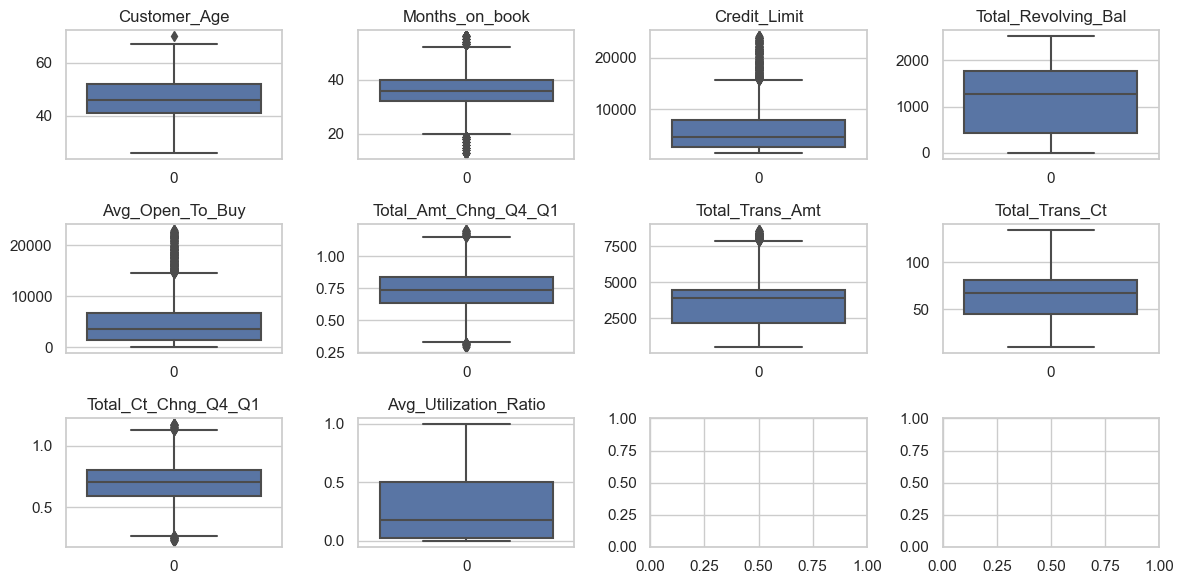

In [641]:
#checking boxplot terhadap outlier
fig, axes = plt.subplots(3, 4, figsize=(12, 6))

for i, col in enumerate(num_features):
    row_idx = i // 4
    col_idx = i % 4
    sns.boxplot(data=X_train_out[col], ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(col)
plt.tight_layout()
plt.show()

Setelah dilakukannya replacement outlier , outlier dari masing masing feature rata rata sudah diganti meskipun terlihat pada feature credit card limit ataupun avg_open_to _buy masih memiliki outlier yang masih banyak. 

#### 5 - 3 Missing Values

Setelah handling outlier terhadap data , maka tahap selanjutnya adalah pengecheckan missing values terhadap data

In [38]:
print(X_train_out.isna().sum())


CLIENTNUM                   0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [39]:
print(X_test_out.isna().sum())


CLIENTNUM                   0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [40]:
print(X_val_out.isna().sum())

CLIENTNUM                   0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


Dari keseluruhan data , tidak terdapat missing value terhadap keseluruhan feature sehingga bisa kita lanjutkan kedalam step selanjutnya.

#### 5 - 4 Feature Selection


Pada tahap ini saya akan mencoba menganalisis feature mana yang relevant dan mana yang tidak relevant terhadap pembuatan model prediksi customer churn kartu kredit. Dalam analisis ini saya akan membagi 2 analisis yaitu analisis terhadap data kategorikal dan data numerikal.

Analisis terhadap data kategorikal disini akan dilakukan dengan 2 cara yaitu dengan fclassif dan mutualinfo. Untuk data numerikal akan dilakukan analisis dengan correlation pearson test terhadap target.

In [41]:
#creating copy data
X_train_out_fs = X_train_out.copy()
X_test_out_fs = X_test_out.copy()
X_val_out_fs = X_val_out.copy()

In [42]:
#mapping target 
mapping = {'Existing Customer' : 0, 'Attrited Customer' : 1}

In [43]:
#mapping target kedalam train , val , test
y_train = y_train.map(mapping)
y_test = y_test.map(mapping)
y_val = y_val.map(mapping)

Asumsi yang dilakukan untuk menentukan kategorikal feature untuk case ini, dilakukan dengan pendekatan seberapa banyak total unique data terhadap feature tersebut. Asumsi yang yang dilakukan apabila total unique data < 10 maka diasumsikan sebagai data kategorikal. 

In [44]:
#splitting cat feature , dan num feature
cat_features = ["Gender" ,'Dependent_count' ,'Education_Level', 'Marital_Status','Income_Category','Card_Category', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']
num_features = ['Customer_Age', 'Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

In [45]:
#creating data feature selection 
fs = data.copy()
fs_cat = data[cat_features]
fs_num = data[num_features]
fs_num['Attrition_Flag'] = data['Attrition_Flag']
target = data['Attrition_Flag']

C:\Users\IMBA PC\AppData\Local\Temp\ipykernel_20016\2664203667.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs_num['Attrition_Flag'] = data['Attrition_Flag']


In [642]:
#overview fs_num
fs_num.head(5)

,Customer_Age,Months_on_book,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,45,39,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,Existing Customer
1,49,44,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,Existing Customer
2,51,36,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,Existing Customer
3,40,34,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,Existing Customer
4,40,21,4716.0,0,4716.0,2.175,816,28,2.500,0.000,Existing Customer


C:\Users\IMBA PC\AppData\Local\Temp\ipykernel_20016\1007996523.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = fs_num.corr()


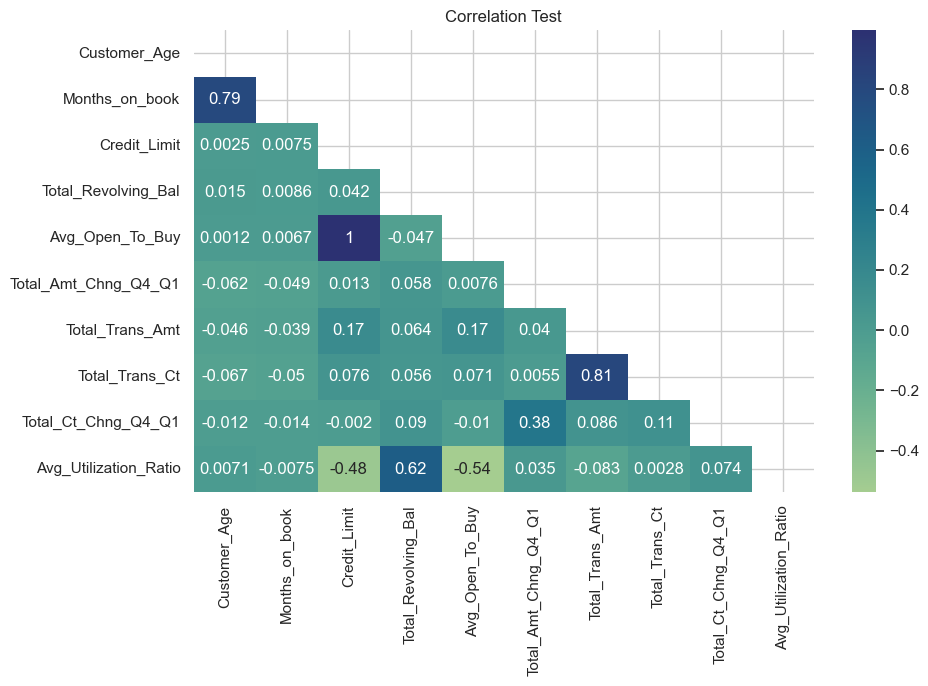

In [47]:
#membuat korelasi test
plt.figure(figsize=(10, 6))
corr_matrix = fs_num.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap ='crest' )
plt.title('Correlation Test')
plt.show()

Dari hasil test correlation dapat dilihat beberapa insight, feature Avg_Open_To_Buy mempunyai korelasi yang kuat terhadap Credit_limit. Ini artinya sebenarnya nilai dari avg_open_to_buy dengan nilai credit_limit mempunyai relevansi yang kuat. Dari hasil lainnya ternyata Avg_Open_To_Buy mempunyai korelasi yang rendah terhadap target. 

Dari hasil diatas akan dicoba cari tahu lebih lanjut berdasarkan deskripsi data untuk avg open to buy dengan credit limit


In [48]:
data[['Avg_Open_To_Buy', 'Credit_Limit']].describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.5,3474.0,9859.0,34516.0
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.0,4549.0,11067.5,34516.0


Dari hasil diatas memang ternyata secara keseluruhan , nilai max , dan standar deviasinya memiliki nilai yang sama. 

Sehingga dari hasil analisis diatas, sebenarnya kita bisa memilih salah satu dari avg open to buy atau credit limit yang akan digunakan dalam pembuatan model. Karena avg open to buy memiliki korelasi yang rendah terhadap target, maka feature avg_open_to_buy akan di drop dalam pembuatan model

In [643]:
#overview
fs_cat.head(5)

,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon
0,M,3,High School,Married,$60K - $80K,Blue,5,1,3
1,F,5,Graduate,Single,Less than $40K,Blue,6,1,2
2,M,3,Graduate,Married,$80K - $120K,Blue,4,1,0
3,F,4,High School,Unknown,Less than $40K,Blue,3,4,1
4,M,3,Uneducated,Married,$60K - $80K,Blue,5,1,0


Dari oveview singkat kita akan membagi kategorikal tersebut kedalam 2 jenis kategorikal, yaitu kategorikal ordinal , dan tidak ordinal.
Yang termasuk kedalam kategorikal ordinal disini yaitu education level, income category , dan card category. Sedangkan Gender dan Marital status tidak termasuk kedalam kategorikal ordinal.
Feature lainnya seperti total relationship count , etc termasuk kedalam kategorikal ordinal, namun disini saya tidak akan mengubahnya kedalam angka karena dari awal sudah didalam bentuk integer.

Dalam pengubahan nilainya dari string kedalam int , dilakukan dengan ordinalencoder dari scikit-learn

In [60]:
#splitting kategorikal
fs_cat_1 = fs_cat.iloc[: , [0, 3]]
fs_cat_2 = fs_cat.iloc[:, [2, 4 , 5]]
fs_cat_3 = fs_cat.iloc[:, [1, 6, 7 , 8]]

fs_cat_3 = fs_cat_3.reset_index(drop=True)

cat_features_1 = fs_cat_1.columns.tolist()
cat_features_2 = fs_cat_2.columns.tolist()

#mengatur tingkat ordinalitas untuk feature education, income, dan card
category_1 = ['Unknown' , 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
category_2 = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
category_3 = ['Blue', 'Silver', 'Gold', 'Platinum']

#encoding fs_cat_1, 2 ,3
oe_cat_1 = OrdinalEncoder()
fs_cat_1 = oe_cat_1.fit_transform(fs_cat_1)

oe_cat_2 = OrdinalEncoder(categories=[category_1, category_2, category_3])
fs_cat_2 = oe_cat_2.fit_transform(fs_cat_2)

fs_cat_1_df = pd.DataFrame(fs_cat_1, columns=cat_features_1)
fs_cat_2_df = pd.DataFrame(fs_cat_2, columns=cat_features_2)

#merge data
fs_cat_combined = pd.concat([fs_cat_1_df, fs_cat_2_df, fs_cat_3], axis=1)

In [61]:
#test f_classif
fclassif_selector = SelectKBest(f_classif, k='all')
fclassif_selector.fit(fs_cat_combined, target)
fclassif_selector = pd.DataFrame({'Feature': fs_cat_combined.columns, 'fclassif_selector Score': fclassif_selector.scores_, 'p-value': fclassif_selector.pvalues_})
fclassif_selector.sort_values(by='fclassif_selector Score', ascending=False, inplace=True)
print(fclassif_selector)

                    Feature  fclassif_selector Score       p-value
8     Contacts_Count_12_mon               441.868050  4.697490e-96
7    Months_Inactive_12_mon               240.910376  1.032664e-53
6  Total_Relationship_Count               233.072886  4.829281e-52
0                    Gender                14.085007  1.757076e-04
5           Dependent_count                 3.652825  5.600239e-02
1            Marital_Status                 3.503085  6.128344e-02
3           Income_Category                 1.866806  1.718717e-01
2           Education_Level                 0.783429  3.761154e-01
4             Card_Category                 0.056086  8.127976e-01


Berdasarkan hasil test  f_classif feature Card_Category mempunyai nilai fclassif yang rendah, ini menandakan feature ini kurang relevant dalam pembuatan model, disini terlihat feature contact_count_12 , months_inactive, serta total relationship memiliki nilai f_classif  yang sangat tinggi terhadap target.

fclassif test disini dilakukan untuk menilai apakah terdapat perbedaan signifikan antara rata-rata kelompok yang berbeda. Ini artinya dalam konteks klasifikasi feature seperti contacts_count, month_inactive, total_relationship sangat reliable dalam pembuatan model klasifikasi. Sedangkan feature card_category disini karena nilainya paling rendah artinya kurang dapat bisa diandalkan dalam membedakan kelas kelas yang berbeeda dari target

In [62]:
# Test mutual information
random_seed = 13
np.random.seed(random_seed)
mutual_info_selector = SelectKBest(mutual_info_classif, k='all')
mutual_info_selector.fit(fs_cat_combined, target)
mutual_info_scores = pd.DataFrame({'Feature': fs_cat_combined.columns, 'Mutual Info Score': mutual_info_selector.scores_})
mutual_info_scores.sort_values(by='Mutual Info Score', ascending=False, inplace=True)
print(mutual_info_scores)

                    Feature  Mutual Info Score
8     Contacts_Count_12_mon           0.021447
7    Months_Inactive_12_mon           0.020593
0                    Gender           0.010142
6  Total_Relationship_Count           0.010020
3           Income_Category           0.005959
2           Education_Level           0.002816
1            Marital_Status           0.000000
4             Card_Category           0.000000
5           Dependent_count           0.000000


Berdasarkan hasil test mutual information feature Card_Category kembali lagi mempunyai nilai mutual info score yang rendah, ini artinya bahwa  nilai dari feature Card_Category terhadap target tidak memiliki hubungan. Hal ini juga sama terhadap feature yang mempunyai nilai mutual info score mendekati 0 , yaitu untuk marital_status , dan dependen_count.

Dari kedua hasil test diatas feature Card_Category mempunyai nilai score mutual information serta fclassif yang rendah. Dengan hasil tersebut dalam pembuatan model nanti  kita bisa mendrop feature ini , sehingga dapat menghasilkan model yang robust.

In [63]:
#copy data
X_train_out_fs = X_train_out.copy()
X_val_out_fs =  X_val_out.copy()
X_test_out_fs = X_test_out.copy()

In [64]:
#feature selection by dropping columns

drop_col = ['Card_Category', 'Avg_Open_To_Buy', 'CLIENTNUM']

X_train_out_fs = X_train_out_fs.drop(columns = drop_col, axis=1)
X_val_out_fs = X_val_out_fs.drop(columns = drop_col , axis=1)
X_test_out_fs = X_test_out_fs.drop(columns = drop_col, axis=1)

#### 5 - 5 Handling Imbalance Data

Sebelum kita melangkah lebih lanjut , langkah terbaik adalah melakukan pengecheckan persentase data target. Data target yang cenderung imbalance akan menghasilkan model yang bias terhadap salah satu variable target. Oleh karena itu penting dilakukan handling imbalance data

In [65]:
#checking imbalance data target
y_train.value_counts()
percentage = (y_train.value_counts()/len(y_train))*100
print (percentage)

0    83.909774
1    16.090226
Name: Attrition_Flag, dtype: float64


Target model seperti terlihat mempunyai data yang imbalance, dimana mempunyai target '0' atau existing customer sebesar ~84% dari keseluruhan. Akibat dari hal tersebut , memungkinkan model akan menghasilkan hasil yang bias terhadap target 0. Untuk mengatasi hal tersebut salah satu cara yang dapat dilakukan yaitu dapat digunakan Upscalling data dengan SMOTENC. Alasan pemilihan cara SMOTENC tidak lain karena mayoritas features mempunyai tipe kategorikal.

In [66]:
X_train_out_fs.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [67]:
#smotenc pada train
num_features_1 = [col for col in num_features if col !='Avg_Open_To_Buy']
cat_features_1 = [col for col in cat_features if col != 'Card_Category']
cat_indices = [X_train_out_fs.columns.get_loc(col) for col in cat_features_1]
smotenc = SMOTENC(categorical_features=cat_indices, random_state=13)
X_train_out_fs_bal, y_train_bal = smotenc.fit_resample(X_train_out_fs, y_train)

In [68]:
#check
percentage = (y_train_bal.value_counts()/len(y_train))*100
print (percentage)

0    83.909774
1    83.909774
Name: Attrition_Flag, dtype: float64


Terlihat data target train sudah balance pada masing masing variabel

####  5 - 6 Feature Scalling & Feature Encoding Pipeline

In [644]:
#overview data
X_train_out_fs_bal.head(5)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,42.0,F,4,Graduate,Single,Less than $40K,33.0,4,2,2,2899.0,1952,0.667,4906.0,94.0,0.679,0.673
1,33.0,F,3,Uneducated,Single,Less than $40K,13.0,5,3,3,1630.0,1008,0.695,4143.0,67.0,0.595,0.618
2,40.0,F,4,Post-Graduate,Single,$40K - $60K,28.0,2,1,2,11642.0,1501,0.935,3912.0,92.0,0.586,0.129
3,50.0,M,4,High School,Married,$120K +,41.0,2,2,2,4606.0,2353,0.667,3912.0,129.0,0.675,0.068
4,57.0,M,2,Post-Graduate,Single,$80K - $120K,43.0,2,3,3,4606.0,1847,0.557,7842.0,61.0,0.794,0.054


Setelah dilakukan step-step seperti handling outlier, missing data, feature selection , handling imbalance , sekarang adalah melakukan feature encoding baik itu numerical feature ataupun categorical feature.

Adapun dari eda sebelumnya dan dari step sebelumnya, kita mendapatkan feature education dan income memiliki ordinalitas, sehingga akan kita mengurutkan variabel dari feature tersebut. Kemudian karena dari total_relation_count, month_inactive , dan contact merupakan feature kategorikal ordinal juga namun sudah diberikan label maka kita tidak melakukan pengurutan variabel tersebut. kategorikal feature lainnya seperti gender, dan status perkawinan akan dilakukan one-hot encoding.

Untuk feature numerik, kita akan lakukan kedalam 2 cara . Untuk feature numerik yang memiliki distribusi data yang normal akan dilakukan encoding dengan standardscaler, sedangkan distribusi data yang skew (tidak normal) akan dilakukan dengan encoding robustscaler.

Setelah semuanya selesai, maka dibuat pipelining dari masing masing feature kedalam masing masing encoding

In [242]:
category_1 #Education_level
category_2 #Income_Category

cat_pipeline_2 = ['Education_Level', 'Income_Category']
cat_pipeline_3 = ['Total_Relationship_Count' , 'Months_Inactive_12_mon' , 'Contacts_Count_12_mon']
cat_pipeline_1 = [col for col in cat_features_1 if col not in cat_pipeline_2 and col not in cat_pipeline_3]


num_pipeline_1 = ['Customer_Age', 'Months_on_book' ] #Normal Distribution
num_pipeline_2 = [col for col in num_features_1 if col not in num_pipeline_1 ] #Not-Normal Distribution ( Skew Distribution )


preprocessing_pipeline = ColumnTransformer([
    ('numerical_normal', StandardScaler(), num_pipeline_1),
    ('numerical_skew', RobustScaler(), num_pipeline_2),  
    ('categorical_1', OneHotEncoder(), cat_pipeline_1), 
    ('categorical_2', OrdinalEncoder(categories=[category_1, category_2]), cat_pipeline_2), 
    ('categorical_3', OrdinalEncoder(), cat_pipeline_3)
])

preprocessing_pipeline.fit(X_train_out_fs_bal)


ColumnTransformer(transformers=[('numerical_normal', StandardScaler(),
                                 ['Customer_Age', 'Months_on_book']),
                                ('numerical_skew', RobustScaler(),
                                 ['Credit_Limit', 'Total_Revolving_Bal',
                                  'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                                  'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
                                  'Avg_Utilization_Ratio']),
                                ('categorical_1', OneHotEncoder(),
                                 ['Gender', 'Dependent_count',
                                  'Marital...
                                ('categorical_2',
                                 OrdinalEncoder(categories=[['Unknown',
                                                             'Uneducated',
                                                             'High School',
                                                             'College',
                                                             'Graduate',
                                                             'Post-Graduate',
                                                             'Doctorate'],
                                                            ['Unknown',
                                                             'Less than $40K',
                                                             '$40K - $60K',
                                                             '$60K - $80K',
                                                             '$80K - $120K',
                                                             '$120K +']]),
                                 ['Education_Level', 'Income_Category']),
                                ('categorical_3', OrdinalEncoder(),
                                 ['Total_Relationship_Count',
                                  'Months_Inactive_12_mon',
                                  'Contacts_Count_12_mon'])])

In [243]:
X_train_processed = preprocessing_pipeline.transform(X_train_out_fs_bal)
X_val_processed = preprocessing_pipeline.transform(X_val_out_fs)
X_test_processed = preprocessing_pipeline.transform(X_test_out_fs)

##  6 - Modeling

#### 6 - 1 Model Definitions

Dalam analisis ini, saya memilih untuk menggunakan algoritma Artificial Neural Network (ANN). Algoritma ANN dipilih karena kemampuannya dalam menangani masalah kompleks dan non-linear. Dengan lapisan-lapisan yang terhubung, ANN mampu mengenali pola-pola yang mungkin sulit ditemukan oleh algoritma lain. Hal ini membuat ANN menjadi pilihan yang potensial untuk menganalisis perilaku pelanggan kartu kredit yang cenderung kompleks.

Adapun Metrics yang digunakan dalam menganalisa performa model yaitu Precision dan ROC AUC. Metrik Precision memberikan gambaran tentang seberapa akurat model kami dalam mengidentifikasi pelanggan yang cenderung churn. Di sisi lain, ROC AUC memberikan informasi tentang sejauh mana model kami mampu membedakan antara kategori pelanggan churn dan non-churn.

Dalam percobaan ini, kami menggunakan pendekatan Functional API. Penggunaan Functional API memungkinkan kami untuk membangun model dengan arsitektur yang kompleks, termasuk lapisan-lapisan dengan percabangan dan penggabungan.

#### 6 - 2 ANN Functional

In [244]:
seed = 13
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

Karena total features pada data adalah 26, disini saya mencoba mengasumsikan neural network pertama dengan 2 layer dimana masing masing memiliki hidden layer 2 dengan total neuron pada layer 1 adalah 15 dan 8. dan total neuron pada layer ke 2 adalah 5 dan 3. Setelah itu digunakan metrics precision, dan kita akan coba analisis

In [292]:
tf.keras.backend.clear_session()
input_layer = Input(shape=(26,))
hidden_layer_1 = Dense(15, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer) #Hidden Layer 1
hidden_layer_2 = Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_1)

hidden_layer_3 = Dense(5, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer) #Hidden Layer 2
hidden_layer_4 = Dense(3, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_3)

#hidden_layer_5 = Dense(24, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_4) #Hidden Layer 3
concat_layer = concatenate([input_layer, hidden_layer_2, hidden_layer_4 ])

output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)
#compile
model_functional.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Precision()])
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 26)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 15)           405         ['input_1[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 5)            135         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 8)            128         ['dense[0][0]']                  
                                                                                              

In [290]:
tf.keras.backend.clear_session()

In [293]:
%%time
history_func = model_functional.fit(X_train_processed,
                                   y_train_bal,
                                   epochs= 100,
                                   validation_data=(X_val_processed, y_val),
                                   batch_size=32)

Epoch 1/100
384/384 [==============================] - 2s 3ms/step - loss: 0.4851 - precision: 0.7609 - val_loss: 0.3878 - val_precision: 0.4910
Epoch 2/100
384/384 [==============================] - 1s 2ms/step - loss: 0.3636 - precision: 0.8412 - val_loss: 0.3438 - val_precision: 0.5268
Epoch 3/100
384/384 [==============================] - 1s 2ms/step - loss: 0.3306 - precision: 0.8587 - val_loss: 0.3191 - val_precision: 0.5458
Epoch 4/100
384/384 [==============================] - 1s 2ms/step - loss: 0.3071 - precision: 0.8709 - val_loss: 0.3173 - val_precision: 0.5489
Epoch 5/100
384/384 [==============================] - 1s 2ms/step - loss: 0.2858 - precision: 0.8815 - val_loss: 0.3139 - val_precision: 0.5285
Epoch 6/100
384/384 [==============================] - 1s 2ms/step - loss: 0.2686 - precision: 0.8907 - val_loss: 0.2965 - val_precision: 0.5677
Epoch 7/100
384/384 [==============================] - 1s 2ms/step - loss: 0.2553 - precision: 0.8967 - val_loss: 0.3008 - val_pre

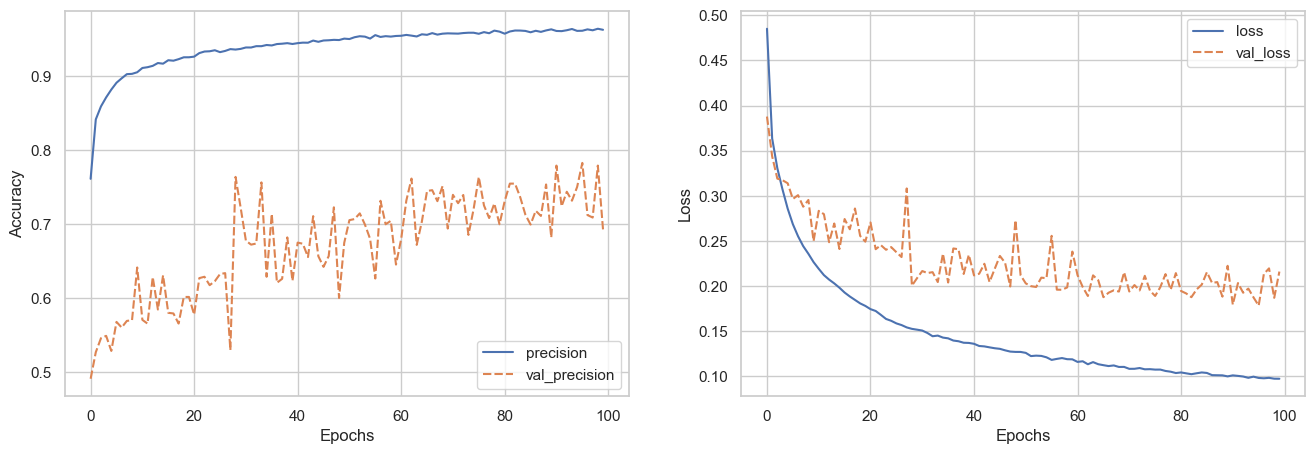

In [294]:
# Create DataFrame
history_func_df = pd.DataFrame(history_func.history)
fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
sns.lineplot(data=history_func_df[['precision', 'val_precision']], ax=ax[0])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
sns.lineplot(data=history_func_df[['loss', 'val_loss']], ax=ax[1])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
plt.show()

Dari hasil awal plot yang ditunjukkan model masih overfitting dimana losses terhadap val loss masih memiliki gap yang cukup tinggi

In [295]:
# Evaluate Test-Set
y_pred_func_train = model_functional.predict(X_train_processed)
y_pred_func_train = np.where(y_pred_func_train >= 0.5 , 1, 0)

print(classification_report(y_train_bal, y_pred_func_train))

y_pred_func_test = model_functional.predict(X_test_processed)
y_pred_func_test = np.where(y_pred_func_test >= 0.5 , 1, 0)

print(classification_report(y_test, y_pred_func_test))

384/384 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      6138
           1       0.96      0.98      0.97      6138

    accuracy                           0.97     12276
   macro avg       0.97      0.97      0.97     12276
weighted avg       0.97      0.97      0.97     12276

48/48 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1277
           1       0.69      0.85      0.76       243

    accuracy                           0.92      1520
   macro avg       0.83      0.89      0.86      1520
weighted avg       0.93      0.92      0.92      1520



Berdasarkan nilai precision terhadap target churn atau 1, disini model masih memiliki hasil yang cukup rendah yaitu sebesar 0.69

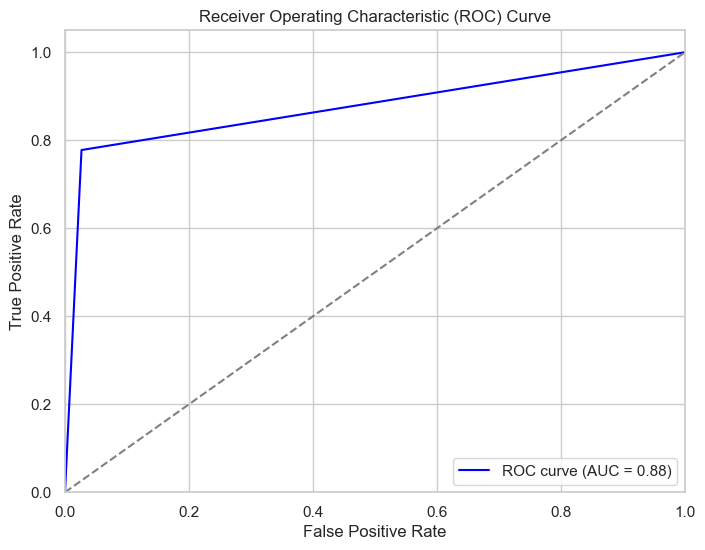

In [493]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_func_test)
auc_roc = roc_auc_score(y_test, y_pred_func_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Berdasarkan auc roc, model yang dibuat memiliki score 0.88. Ini artinya model yang dibuat cukup baik dalam membedakan antara variabel target yaitu churn customer dengan customer yang tidak churn

#### 6 - 3 ANN Functional Improvement

Karena dengan model sebelumnya hasil dari roc auc sudah lumayan baik akan tetapi score dari nilai precisionnya masih buruk, maka disini akan dilakukan dengan beberapa pendekatan. Pendekatan pertama activation akan diubah dengan sigmoid, disini dicoba dimungkinkan akan menghasilkan prediksi precision model yang jauh lebih baik.
pendekatan kedua pada model functional ditambahkan 2 callback , yaitu early stopping dan callback. early stopping berfungsi  untuk menghentikan pelatihan model jika tidak terjadi peningkatan performa pada data validasi. Hal ini membantu menghindari overfitting dan menjaga agar model tidak melampaui poin optimalnya.
Selain itu disini juga ditambahkan learning rate , learning rate merupakan faktor penting dalam proses optimisasi model. Dengan mengatur learning rate secara adaptif, disini model akan dapat menemukan nilai konvergen yang lebih cepat.

In [387]:
def model_functional_3(input1, input2, input3, input4,  activate, epoch, regularization, learning_rate, optimizer):
    input_layer = Input(shape=(26,))
    hidden_layer_1 = Dense(input1, activation= activate, kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer) # Hidden Layer 1

    hidden_layer_2 = Dense(input2, activation= activate, kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_1)

    hidden_layer_3 = Dense(input3, activation= activate, kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer) # Hidden Layer 3

    hidden_layer_4 = Dense(input4, activation= activate, kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_3)

    concat_layer = concatenate([input_layer, hidden_layer_2, hidden_layer_4])

    output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

    model_functional_3 = Model(inputs=input_layer, outputs=output_layer)
    

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) if optimizer == 'adam' else optimizer
    model_functional_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[tf.keras.metrics.Precision()])

    checkpoint_callback = ModelCheckpoint(filepath='best_model_weights.h5', monitor='val_precision', save_best_only=True, save_weights_only=True, mode='max')
    early_stopping = EarlyStopping(monitor='val_loss', patience= 20, restore_best_weights=True)

    pipeline_seq_train = tf.data.Dataset.from_tensor_slices((X_train_processed, y_train_bal)).batch(20).shuffle(len(y_train_bal))
    pipeline_seq_val = tf.data.Dataset.from_tensor_slices((X_val_processed, y_val)).batch(20)

    model_func_fin = model_functional_3.fit(pipeline_seq_train, epochs=epoch, validation_data=pipeline_seq_val, callbacks=[early_stopping, checkpoint_callback])

    model_func_fin_df = pd.DataFrame(model_func_fin.history)
    fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
    sns.lineplot(data=model_func_fin_df[['precision', 'val_precision']], ax=ax[0])
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    sns.lineplot(data=model_func_fin_df[['loss', 'val_loss']], ax=ax[1])
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    plt.show()

    return  model_functional_3

Epoch 1/200
614/614 [==============================] - 2s 2ms/step - loss: 0.4123 - precision: 0.8165 - val_loss: 0.2984 - val_precision: 0.5887
Epoch 2/200
614/614 [==============================] - 1s 2ms/step - loss: 0.3120 - precision: 0.8627 - val_loss: 0.2479 - val_precision: 0.6189
Epoch 3/200
614/614 [==============================] - 1s 2ms/step - loss: 0.2433 - precision: 0.8949 - val_loss: 0.2048 - val_precision: 0.7244
Epoch 4/200
614/614 [==============================] - 1s 2ms/step - loss: 0.2128 - precision: 0.9077 - val_loss: 0.2061 - val_precision: 0.7035
Epoch 5/200
614/614 [==============================] - 1s 2ms/step - loss: 0.1868 - precision: 0.9193 - val_loss: 0.2941 - val_precision: 0.5714
Epoch 6/200
614/614 [==============================] - 1s 2ms/step - loss: 0.1709 - precision: 0.9286 - val_loss: 0.2128 - val_precision: 0.6693
Epoch 7/200
614/614 [==============================] - 1s 2ms/step - loss: 0.1563 - precision: 0.9358 - val_loss: 0.2379 - val_pre

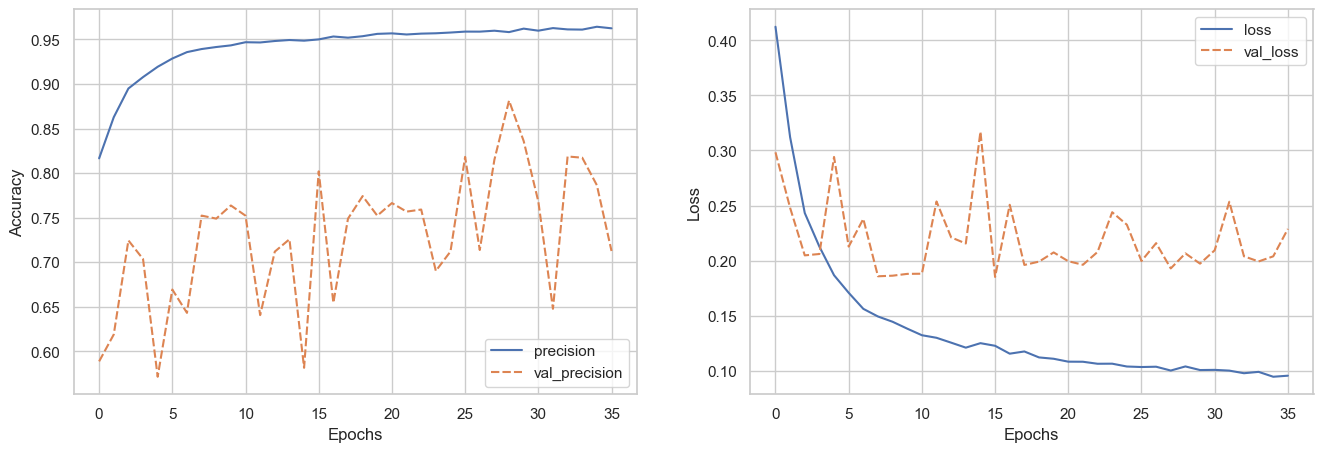

CPU times: total: 6min 36s
Wall time: 44.7 s


In [392]:
%%time
tf.keras.backend.clear_session()
np.random.seed(13)
tf.random.set_seed(13)
model_func_fin = model_functional_3(input1=15, input2=8, input3= 5, input4=3, activate='sigmoid', epoch=200,
                   regularization= None, learning_rate=0.01, optimizer='adam')

Dari hasil yang sudah dilakukan,  model disini ternyata masih overfitting akan tetapi model secara waktu komputasi memiliki waktu yang lebih cepat.

In [393]:
#loading the best model weight 
model_func_fin.load_weights('best_model_weights.h5')

In [404]:
# Evaluate Test-Set
y_pred_func_train = model_func_fin.predict(X_train_processed)
y_pred_func_train = np.where(y_pred_func_train >= 0.5 , 1, 0)

print(classification_report(y_train_bal, y_pred_func_train))

y_pred_func_test = model_func_fin.predict(X_test_processed)
y_pred_func_test = np.where(y_pred_func_test >= 0.5 , 1, 0)

print(classification_report(y_test, y_pred_func_test))
report_test = classification_report(y_test, y_pred_func_test, output_dict=True)

384/384 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6138
           1       0.99      0.90      0.94      6138

    accuracy                           0.94     12276
   macro avg       0.95      0.94      0.94     12276
weighted avg       0.95      0.94      0.94     12276

48/48 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1277
           1       0.85      0.78      0.81       243

    accuracy                           0.94      1520
   macro avg       0.90      0.88      0.89      1520
weighted avg       0.94      0.94      0.94      1520



Berdasarkan hasil yang sudah dilakukan ternyata model mengalami improvement dari segi precision terhadap customer churn atau 1. Dimana dari sebelumnya bernilai 0.69 , dengan beberapa imputasi pada model functional menghasilkan model dengan precision sebesar 0.85

In [408]:
pre_func = report_test['1']['precision']

In [499]:
auc_roc = roc_auc_score(y_test, y_pred_func_test)
auc_roc

0.8755764378317236

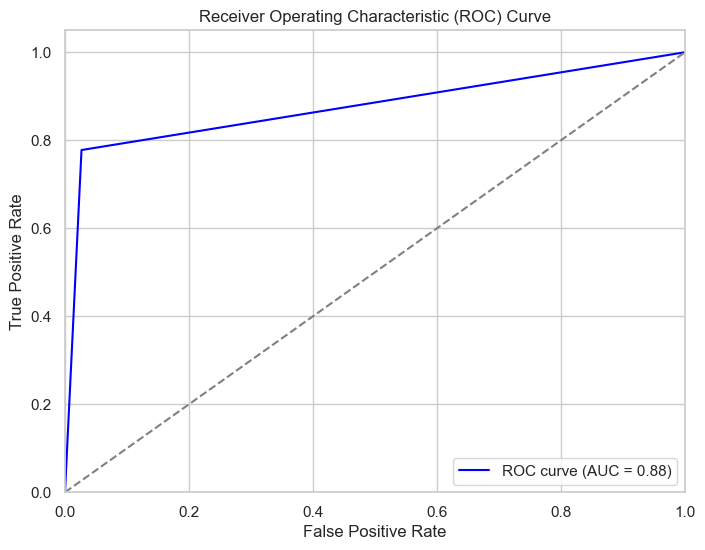

In [407]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_func_test)
auc_roc = roc_auc_score(y_test, y_pred_func_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])   
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Dari nilai roc auc , terlihat model mempunyai hasil roc score sebesar 0.88. Nilai yang dihasilkan sebelum dan sesudah improvement tidak berbeda. Dengan demikian model dengan improvement Functional memiliki hasil yang lebih baik.

#### 6 - 4 Gradient Search Other Algorithm

Selain dari model ann, disini saya akan mencoba menggunaakan algoritma lain seperti randomforest, decision tree, gradientboosting, dan xgb. hal ini untuk mencari tahu alternatif algoritma untuk meningkatkan performa dalam memprediksi churn pelanggan kartu kredit. Dengan eksplorasi ini, didapatkan wawasan lebih dalam tentang bagaimana algoritma-algoritma ini berkinerja dalam kasus churn pelanggan kartu kredit, serta menemukan cara terbaik untuk mengoptimalkan model sebelumnya.

Disini dipilih dilakukan gradientsearch guna langsung menemukan hasil optimal terhadap masing masing algoritma. Metrics yang digunakan masih sama dalam penggunaan ann yaitu precision.

In [441]:
#fungsi matrix & plot
def report_class_auc_fig (model) :
    y_pred_train = model.predict(X_train_processed)
    y_pred_test = model.predict(X_test_processed)
    conf_matrix_train = classification_report(y_train_bal, y_pred_train)
    conf_matrix_test = classification_report(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train_bal, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    report_test = classification_report(y_test, y_pred_test, output_dict=True)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
    auc_roc = roc_auc_score(y_test, y_pred_test)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % auc_roc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    return y_pred_test, report_test, auc_roc, cm_train, cm_test

In [317]:
# Create a Random Forest classifier
param_grid_rf = {
    'n_estimators': [100, 150],
    'max_depth': [None, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

scorer = make_scorer(precision_score)
grid_search_rf = GridSearchCV(rf_clf, param_grid=param_grid_rf, cv=5, scoring=scorer)
grid_search_rf.fit(X_train_processed, y_train_bal)
print("Best Parameters - Random Forest: ", grid_search_rf.best_params_)
print("Best Score - Random Forest: ", grid_search_rf.best_score_)

Best Parameters - Random Forest:  {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score - Random Forest:  0.9645753030891738


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6138
           1       1.00      1.00      1.00      6138

    accuracy                           1.00     12276
   macro avg       1.00      1.00      1.00     12276
weighted avg       1.00      1.00      1.00     12276

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1277
           1       0.78      0.84      0.81       243

    accuracy                           0.94      1520
   macro avg       0.87      0.90      0.88      1520
weighted avg       0.94      0.94      0.94      1520



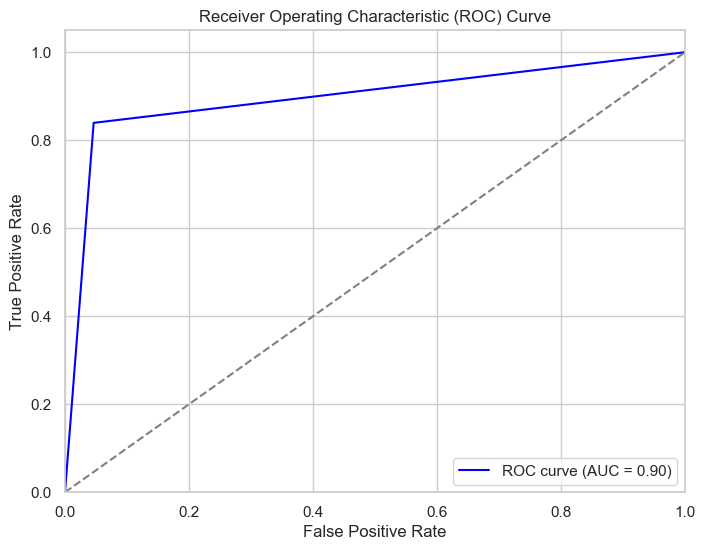

In [423]:
y_pred_test, report_test, auc_roc = report_class_auc_fig(grid_search_rf)
y_pred_test_rf = y_pred_test
pre_rf = report_test['1']['precision']
auc_roc_rf = auc_roc

Dari nilai precision yang didapatkan, terlihat hasil terhadap class 1 memiliki nilai precision sebesar 0.78. Disisi lain algoritma ranfomforest memiliki roc score sebesar 0.9. Ini menandakan model rf sudah baik dalam membedakan antara variabel

In [356]:
# Define the parameter grid
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
scorer = make_scorer(precision_score)
dt_clf = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(dt_clf, param_grid=param_grid_dt, cv=5, scoring=scorer)
grid_search_dt.fit(X_train_processed, y_train_bal)
print("Best Parameters - Decision Tree: ", grid_search_dt.best_params_)
print("Best Score - Decision Tree: ", grid_search_dt.best_score_)

Best Parameters - Decision Tree:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score - Decision Tree:  0.9368349103943651


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6138
           1       0.97      0.97      0.97      6138

    accuracy                           0.97     12276
   macro avg       0.97      0.97      0.97     12276
weighted avg       0.97      0.97      0.97     12276

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1277
           1       0.67      0.78      0.72       243

    accuracy                           0.90      1520
   macro avg       0.81      0.85      0.83      1520
weighted avg       0.91      0.90      0.91      1520



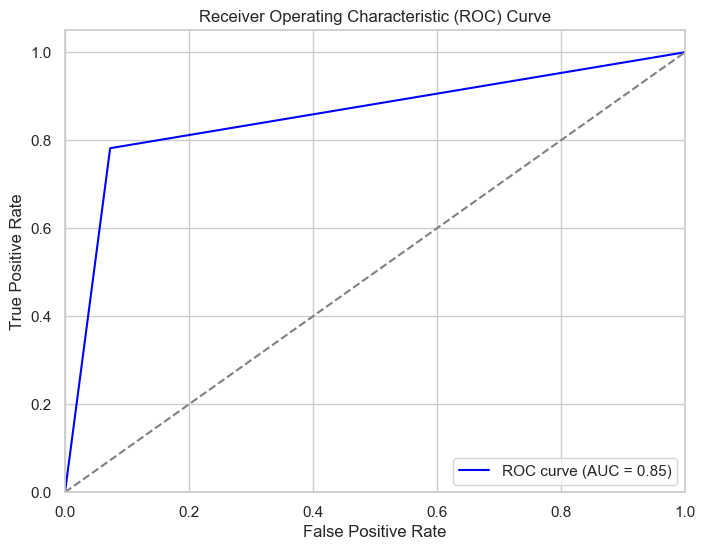

In [425]:
y_pred_test, report_test, auc_roc = report_class_auc_fig(grid_search_dt)
y_pred_test_dt = y_pred_test
pre_dt = report_test['1']['precision']
auc_roc_dt = auc_roc

Dari nilai precision yang didapatkan, terlihat hasil terhadap class 1 memiliki nilai precision sebesar 0.67. Disisi lain algoritma decision tree memiliki roc score sebesar 0.85. Ini menandakan model dt sudah baik dalam membedakan antara variabel

In [357]:
# Define the parameter grid
param_grid_gb = {
    'n_estimators': [100],
    'learning_rate': [0.1, 0.5],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}
scorer = make_scorer(precision_score)
gb_clf = GradientBoostingClassifier()
grid_search_gb = GridSearchCV(gb_clf, param_grid=param_grid_gb, cv=5, scoring=scorer)
grid_search_gb.fit(X_train_processed, y_train_bal)
print("Best Parameters - Gradient Boosting: ", grid_search_gb.best_params_)
print("Best Score - Gradient Boosting: ", grid_search_gb.best_score_)

Best Parameters - Gradient Boosting:  {'learning_rate': 0.5, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score - Gradient Boosting:  0.9763309893637834


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6138
           1       1.00      1.00      1.00      6138

    accuracy                           1.00     12276
   macro avg       1.00      1.00      1.00     12276
weighted avg       1.00      1.00      1.00     12276

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1277
           1       0.80      0.85      0.82       243

    accuracy                           0.94      1520
   macro avg       0.88      0.90      0.89      1520
weighted avg       0.94      0.94      0.94      1520



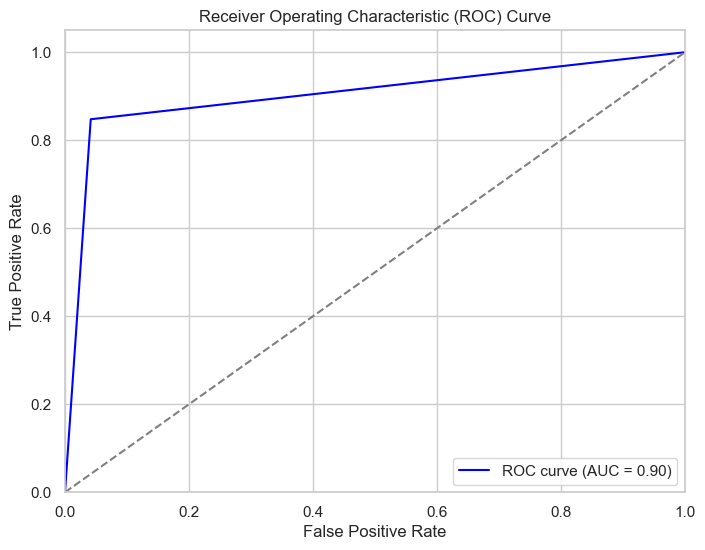

In [426]:
y_pred_test, report_test, auc_roc = report_class_auc_fig(grid_search_gb)
y_pred_test_gb = y_pred_test
pre_gb = report_test['1']['precision']
auc_roc_gb = auc_roc

Dari nilai precision yang didapatkan, terlihat hasil terhadap class 1 memiliki nilai precision sebesar 0.80. Disisi lain algoritma gradientboost memiliki roc score sebesar 0.9. Ini menandakan model gradientboost sudah baik dalam membedakan antara variabel

In [349]:
# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100],  
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'gamma': [0.1, 0.5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'random_state': [13],
}
scorer = make_scorer(precision_score)
xgb_clf = XGBClassifier()  
grid_search_xgb = GridSearchCV(xgb_clf, param_grid=param_grid_xgb, cv=5, scoring=scorer)
grid_search_xgb.fit(X_train_processed, y_train_bal)
print("Best Parameters - XGBoost: ", grid_search_xgb.best_params_)
print("Best Score - XGBoost: ", grid_search_xgb.best_score_)

Best Parameters - XGBoost:  {'colsample_bytree': 0.8, 'gamma': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'random_state': 13, 'subsample': 0.8}
Best Score - XGBoost:  0.974987397804013


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6138
           1       1.00      1.00      1.00      6138

    accuracy                           1.00     12276
   macro avg       1.00      1.00      1.00     12276
weighted avg       1.00      1.00      1.00     12276

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1277
           1       0.81      0.85      0.83       243

    accuracy                           0.94      1520
   macro avg       0.89      0.91      0.90      1520
weighted avg       0.95      0.94      0.95      1520



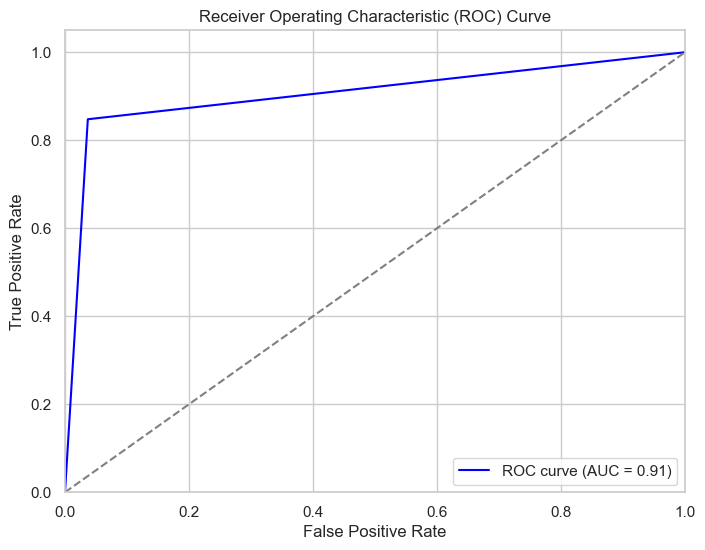

In [427]:
y_pred_test, report_test, auc_roc = report_class_auc_fig(grid_search_xgb)
y_pred_test_xgb = y_pred_test
pre_xgb = report_test['1']['precision']
auc_roc_xgb = auc_roc

Dari nilai precision yang didapatkan, terlihat hasil terhadap class 1 memiliki nilai precision sebesar 0.81. Disisi lain algoritma xgb memiliki roc score sebesar 0.91. Ini menandakan model xgb sudah baik dalam membedakan antara variabel

#### 6 - 5 Model Comparison

Setelah dilakukan pembuatan model ann ataupun algoritma lainnya maka langkah selanjutnya adalah melihat model manakah yang paling baik diantara lainnya.

In [645]:
report = [
    {
        'Classifier': 'ANN Functional',
        'Precision_Class_1': pre_func,
        'AUC_ROC': auc_roc
    },
    {
        'Classifier': 'RandomForest',
        'Precision_Class_1': pre_rf,
        'AUC_ROC': auc_roc_rf
    },
    {
        'Classifier': 'DecisionTree',
        'Precision_Class_1': pre_dt,
        'AUC_ROC': auc_roc_dt
    },
    {
        'Classifier': 'GradientBoost',
        'Precision_Class_1': pre_gb,
        'AUC_ROC': auc_roc_gb
    },
    {
        'Classifier': 'XGBoost',
        'Precision_Class_1': pre_xgb,
        'AUC_ROC': auc_roc_xgb
    }

]
report_df = pd.DataFrame(report)

In [646]:
report_df

,Classifier,Precision_Class_1,AUC_ROC
0,ANN Functional,0.847534,0.875576
1,RandomForest,0.775665,0.896652
2,DecisionTree,0.671378,0.854533
3,GradientBoost,0.795367,0.903117
4,XGBoost,0.814229,0.905466


Terlihat dari masing masing model, model yang dibuat dengan ANN functional memiliki precision terhadap class 1 , yang paling tinggi dengan lainnya. Namun apabila dibandingkan dengan nilai AUC ROC model xgboost memiliki nilai yang paling bagus dibandingkan lainnya. Karena nilai roc pada masing masing sudah dapat dikatakan baik yaitu diatas 0.85 , maka disini saya memutuskan model dengan ANN functional merupakan model yang paling baik dari seluruh model yang dibuat.

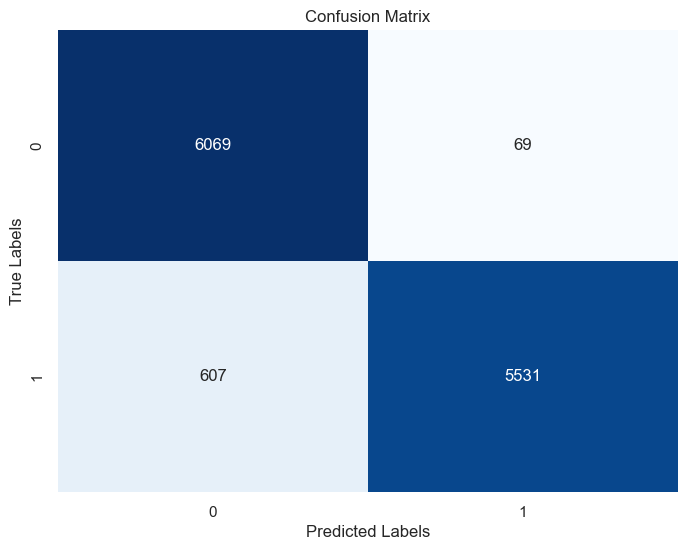

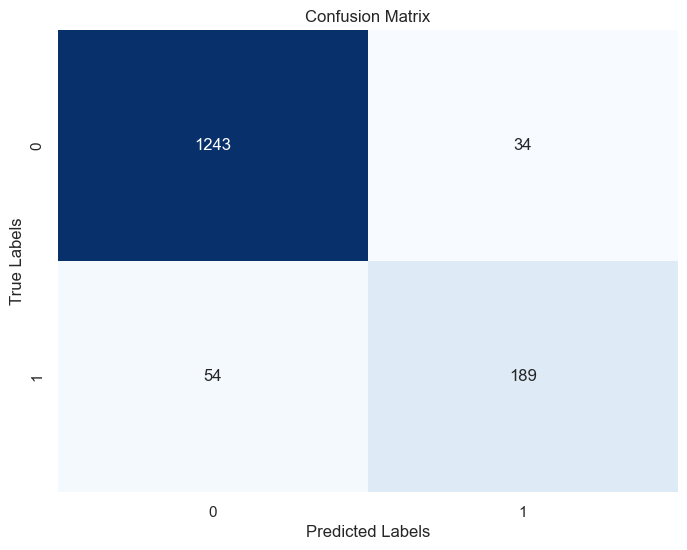

In [486]:
#confusion matrix
cm_train = confusion_matrix(y_train_bal,y_pred_func_train)
cm_test = confusion_matrix(y_test,y_pred_func_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Dari hasil confusion matrix terlihat, untuk hasil test model ann dapat memprediksi dengan benar sebanyak 189 customer yang churn. Akan tetapi model ann gagal dalam memprediksi sebanyak 54 customer yang seharusnya diprediksi CHURN , akan tetapi terprediksi tidak churn. 

####  6 - 6 Model Advantage & Disadvantage

Kelebihan:

- Model ini memiliki kemampuan untuk mengidentifikasi pelanggan yang berpotensi churn dengan tingkat presisi yang tinggi, sehingga bisnis dapat lebih akurat dalam mengambil tindakan pencegahan.

- Dengan kemampuan model dalam mengklasifikasikan pelanggan dengan baik, bisnis dapat mengoptimalkan strategi pemasaran dengan lebih efektif. Hal ini memungkinkan bisnis untuk menyusun kampanye pemasaran yang lebih tepat sasaran dan sesuai dengan preferensi pelanggan.

- Dengan adanya model yang canggih dalam mengidentifikasi pelanggan churn, bisnis dapat mengalokasikan sumber daya dengan lebih efisien. Upaya dan anggaran dapat difokuskan pada pelanggan yang berpotensi churn, daripada dihabiskan pada pelanggan yang tidak memiliki risiko tinggi untuk berhenti berlangganan.

Kelemahan:

- Model ini sangat tergantung pada data historis pelanggan. Jika pola perilaku pelanggan berubah secara signifikan, model mungkin tidak dapat menghasilkan prediksi yang akurat.

- Kualitas data yang buruk, seperti missing values atau outliers, dapat memengaruhi kinerja model. Model yang dibangun dengan data yang buruk mungkin menghasilkan prediksi yang tidak akurat.

- Model ini mungkin tidak memperhitungkan faktor eksternal yang dapat memengaruhi perilaku pelanggan, seperti situasi ekonomi atau perubahan tren pasar.

#### 6 - 7 Model Improvement 

Model Improvement next :

- Meskipun hasil yang didapatkan baik, akan tetapi ada beberapa improvement yang dapat diusulkan. Dalam hal ini mungkin dapat dilakukan dengan mencari jumlah neuron dan hidden layer yang lebih tepat ,penggunakan initializer, dan regularisasi lainnya dan masih banyak lagi.

- Selain itu bisa dilakukan pencarian hasil terbaik dengan menggunakan GridSearchCV dalama mencari nilai parameter yang lebih optimal.

- Improvement yang dapat dilakukan dengan melakukan Feature engineering , seperti pilihan feature selection yang lebih baik lagi.

#### 6 - 8 Business Analysis

Dari analisis yang sebelumnya sudah dilakukan, ternyata model dengan arsitektur Functional API merupakan yang paling baik dimana mempunyai nilai precision yang paling baik yaitu sebesar 0.84. selain itu model juga memiliki nilai roc auc yang tinggi yaitu sebesar 0.88.

Dalam bisnis, model dengan tingkat presisi yang tinggi, seperti yang mampu memprediksi dengan presisi sebesar 84%, memiliki nilai yang sangat berarti dalam mengidentifikasi pelanggan yang berpotensi churn. Dengan presisi yang lebih tinggi, bisnis dapat menghindari kesalahan dalam mengklasifikasikan pelanggan yang sebenarnya tidak akan berhenti berlangganan dan dapat lebih fokus pada pelanggan yang benar-benar memiliki risiko untuk churn. Selain itu, model dengan presisi yang tinggi juga membantu bisnis dalam mengoptimalkan strategi pemasaran. Bisnis dapat menggunakan hasil prediksi model untuk mengidentifikasi segmen pelanggan yang berbeda dan menyesuaikan strategi pemasaran sesuai dengan preferensi dan kebutuhan pelanggan. Hal ini memungkinkan bisnis untuk meningkatkan retensi pelanggan dan memberikan layanan yang lebih efektif.

#### 6 - 9 Model Explanation

Selain dari impretasi business, kita juga harus paham bagaimana model ini dapat melakukan prediski . Feature apa yang sangat mempengaruhi dalam prediski customer yang churn ataupun tidak.  Untuk mengetahui hal tersebut dilakukan model explanation dengan shap

In [ ]:
# Transform the data using the preprocessing pipeline
X_train_transformed = preprocessing_pipeline.transform(X_train_out_fs_bal)

# Get the column names for the transformed data
transformed_column_names = (
    num_pipeline_1 + num_pipeline_2 +
    list(preprocessing_pipeline.named_transformers_['categorical_1']
         .get_feature_names_out(input_features=cat_pipeline_1)) +
    ['Education_Level', 'Income_Category'] +
    list(preprocessing_pipeline.named_transformers_['categorical_3']
         .get_feature_names_out(input_features=cat_pipeline_3))
)

# Create a DataFrame from the transformed data and column names
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformed_column_names)

In [482]:
X_train_transformed_df.shape

(12276, 26)

Permutation explainer: 501it [00:27, 11.75it/s]                         


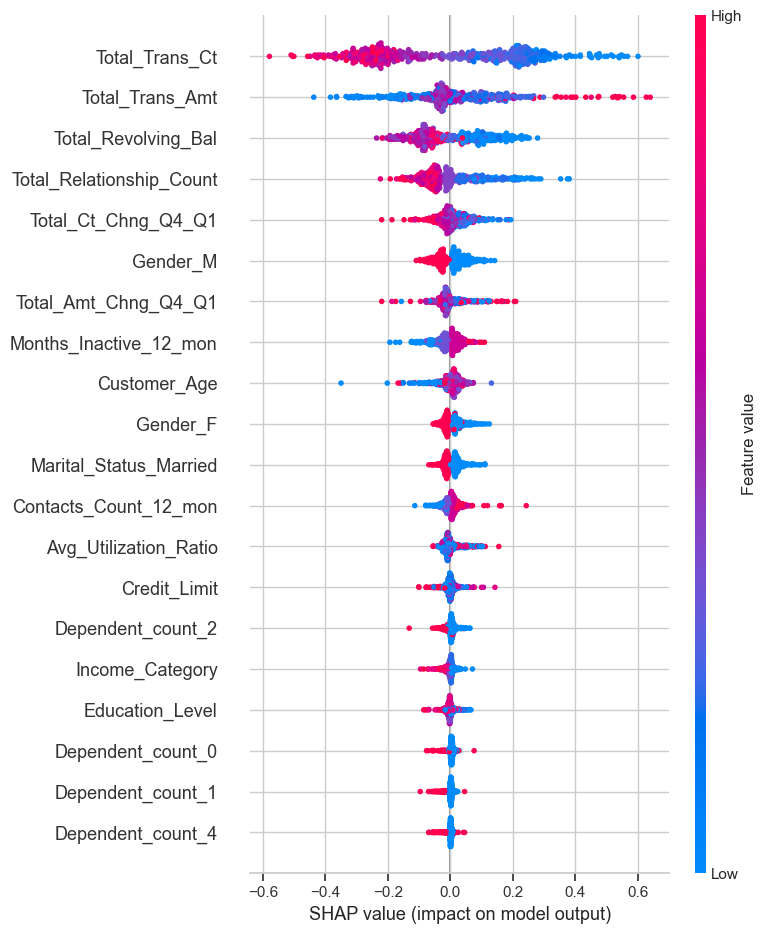

In [512]:
import random

explainer = shap.Explainer(model_func_fin, X_train_processed)
# Calculate SHAP values for a random subset of data
subset_indices = random.sample(range(X_train_transformed_df.shape[0]), 500)  
shap_values = explainer(X_train_transformed_df.iloc[subset_indices])  

# Plot a summary plot of SHAP values for the random subset
shap.summary_plot(shap_values, X_train_transformed_df.iloc[subset_indices], feature_names=X_train_transformed_df.columns)

Terlihat dari hasil plot model yang dilakukan oleh SHAP, feature yang paling berpengaruh dalam model menghasilkan prediksi adalah feature Total_trans_ct , Total_trans_Amt, Total_revolving_bal, sedangkan feature yang kurang berpengaruh antara lain dependent count dan education level. feature total trans ct adalah fitur jumlah transaksi yang dilakukan oleh pelanggan. Jumlah transaksi ini merupakan data tentang seberapa aktif pelanggan dalam menggunakan kartu kredit mereka. sedangkan feature Total_trans_Amt , merupakan data  total jumlah uang yang dihabiskan oleh pelanggan dalam transaksi menggunakan kartu kredit. sedangkan Total_revolving_bal mengacu pada total saldo yang belum dibayar dari tagihan bulan sebelumnya. 

## 7 - Model Saving

In [528]:
import pickle

with open('pipeline.pkl', 'wb') as file_1 :
  pickle.dump(preprocessing_pipeline, file_1)

In [530]:
# Freze model
model_func_fin.trainable = False
model_func_fin.summary()
model_func_fin.save('model_functional_final.h5')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 26)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 15)           405         ['input_1[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 5)            135         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 8)            128         ['dense[0][0]']                  
                                                                                              

## 8 - Model Inferencing

In [ ]:
model_func_fin.save('model_functional_final.h5')


with open ('pipeline.pkl' , 'rb') as file_a:
    pipeline = pickle.load(file_a)


# Load the functional model
model_functional_final = tf.keras.models.load_model('model_functional_final.h5')

In [534]:
model_functional_final.load_weights('best_model_weights.h5')

In [536]:
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [539]:
    #membuat data baru
    data_inf = {
                'Customer_Age' : 20,
                'Gender' : 'M',
                'Dependent_count' : 3,
                'Education_Level' : 'Graduate',
                'Marital_Status' :'Married',
                'Income_Category' : '$60K - $80K',
                'Card_Category' : 'Blue',
                'Months_on_book' : 20,
                'Total_Relationship_Count' : 3,
                'Months_Inactive_12_mon' : 2,
                'Contacts_Count_12_mon' : 3,
                'Credit_Limit' : 10000,
                'Total_Revolving_Bal' : 500,
                'Avg_Open_To_Buy' : 4000,
                'Total_Amt_Chng_Q4_Q1' : 2.5,
                'Total_Trans_Amt' : 2000,
                'Total_Trans_Ct' : 30,
                'Total_Ct_Chng_Q4_Q1' : 3.1,
                'Avg_Utilization_Ratio' : 0.4
                }
    data_inf = pd.DataFrame([data_inf])

In [546]:
data_inf_transform = pipeline.transform(data_inf)

In [551]:
y_predict_func = model_functional_final.predict(data_inf_transform)
y_pred_func = np.where(y_predict_func >= 0.5, 1, 0)

1/1 [==============================] - 0s 40ms/step


In [647]:
print("Hasil Prediksi Model Functional:")
if y_pred_func == 1 :
    print ("Pelanggan kemungkinan akan churn")
else :
    print ("Pelanggan kemungkinan  tidak akan churn")

Hasil Prediksi Model Functional:
Pelanggan kemungkinan  tidak akan churn


## 9 - Kesimpulan

Dari hasil EDA ada beberapa insight yang dapat diperoleh, customer dengan gender perempuan, tingkat edukasi yang rendah, status perkawinan sudah menikah, pendapatan dibawah $40k, kartu tipe blue, dan customer yang memiliki 3 produk memiliki total pelanggan churn yang lebih tinggi. Dari hasil lainnya, customer dengan jumlah dependent sebanyak 3 orang, total produk yang lebih sedikit, tidak aktif lebih dari 4 bulan , dan sudah lebh dari 5kali dikontak oleh bank memiliki tingkat persentase churn yang lebih tinggi. Selain itu didapatkan dari hasil historgram, customer dengan umur 48 tahun, customer yang sudah bersama dengan bank selama 36 bulan, credit limit yang rendah, total revolving rendah, rata rata open to buy yang rendah, total balance yang sebesar 0.6,  total transaskinya sebesar 2216, jumlah total transaksi sebesar 43, total change sebesar 0.5 dan avg utilization ratio sebesar 0 memiliki tingkat churn yang tinggi.

Dari hasil model yang sudah dibuat,  model Functional API menunjukkan kinerja terbaik dengan nilai precision sebesar 0.84 dan roc auc sebesar 0.88. Model tersebut memiliki kemampuan yang baik dalam mengidentifikasi pelanggan yang berpotensi churn. Dengan menggunakan model ini, bisnis dapat memfokuskan strategi pemasaran pada pelanggan yang memiliki risiko churn yang lebih tinggi, serta meningkatkan retensi pelanggan dan memberikan layanan yang lebih efektif.